In [1]:
#importig required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

In [2]:
# variables to store Different data as the names
MovieName = []
Category = []
RunTime = []    
YearOfRelease = []
Director = []
Stars = []
Rating = []
Votes = []
Gross = []

In [3]:
#requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})

# Data Extraction/Collection

In [4]:
# loop for the webpages to be next
for page in range(1,5):
    url = requests.get('https://www.imdb.com/list/ls023757565/?st_dt=&mode=detail&page={}&sort=list_order,asc'.format(page))
    soup=BeautifulSoup(url.content,'html.parser')
    movi = soup.find_all('div',attrs = {'class':'lister-item mode-detail'})
    
    
    # loop for single page data extraction
    
    for i in movi:
        
        # movies name
        MovieName.append(i.h3.a.text.strip())
        
        #Category
        Category.append(i.find('span',class_='genre').text.strip())
        
        # Certificate Certificate.append
        #c = i.find('p',class_='text-muted').span.text.strip()
        #Certificate.append(c) if len(c)<=5 else np.nan
        
         
        # runtime
        RunTime.append(i.p.find('span',class_='runtime').text.replace('min',''))
        
        # year of release
        y = i.h3.find('span',class_='lister-item-year text-muted unbold').text.replace('(' ,'').replace(')','')
        year = ''.join([i for i in y if i.isdigit()])
        YearOfRelease.append(year)
        #YearOfRelease.append(i.h3.find('span',class_='lister-item-year text-muted unbold').text.replace('(' ,'').replace(')',''))
        
        # for Directors
        d = i.find_all('p',attrs = {'class':'text-muted text-small'})[1].text
        d= d.split('|')
        d = d[0].strip()
        d = d.replace('Directors:','').replace('\n','').replace('Director:','')
        Director.append(d)
        
        # for Actors
        a = i.find_all('p',attrs = {'class':'text-muted text-small'})[1].text
        a = a.split('|')
        a = a[1].strip()
        a = a.replace('Stars:','').replace('\n','')
        Stars.append(a)
        
        # Rating 
        Rating.append(i.find("div",class_='ipl-rating-star small').find('span',class_='ipl-rating-star__rating').text)
        
        # Votes 
        v = i.find_all('span',attrs={'name':'nv'})
        Votes.append(v[0].text)
        
        # Gross
        g = i.find_all('span',attrs={'name':'nv'})[1].text if len(v)>1 else np.nan
        Gross.append(g)
    

## Dataframe Creation

In [5]:
imdb_movies = {
    'Title':MovieName,
    'Genre':Category,
    'Runtime':RunTime,
    'YearOfRelease':YearOfRelease,
    'Directors':Director,
    'Stars':Stars,
    'Ratings':Rating,
    'Votes':Votes,
    'Gross':Gross
}

In [6]:
data = pd.DataFrame(imdb_movies)
data

,Title,Genre,Runtime,YearOfRelease,Directors,Stars,Ratings,Votes,Gross
0,The Matrix,"Action, Sci-Fi",136,1999,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",8.7,"1,926,843",$171.48M
1,The Matrix Reloaded,"Action, Sci-Fi",138,2003,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",7.2,"600,751",$281.49M
2,The Matrix Revolutions,"Action, Sci-Fi",129,2003,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",6.7,"518,672",$139.31M
3,Alien,"Horror, Sci-Fi",117,1979,Ridley Scott,"Sigourney Weaver, Tom Skerritt, John Hurt, Ver...",8.5,"889,941",$78.90M
4,Aliens,"Action, Adventure, Sci-Fi",137,1986,James Cameron,"Sigourney Weaver, Michael Biehn, Carrie Henn, ...",8.4,"723,382",$85.16M
...,...,...,...,...,...,...,...,...,...
395,Jerry Maguire,"Comedy, Drama, Romance",139,1996,Cameron Crowe,"Tom Cruise, Cuba Gooding Jr., Renée Zellweger,...",7.3,"271,456",$153.95M
396,Ouija: Origin of Evil,"Drama, Horror, Mystery",99,2016,Mike Flanagan,"Elizabeth Reaser, Lulu Wilson, Annalise Basso,...",6.2,"67,068",$35.14M
397,Resident Evil,"Action, Horror, Sci-Fi",100,2002,Paul W.S. Anderson,"Milla Jovovich, Michelle Rodriguez, Ryan McClu...",6.6,"275,165",$40.12M
398,Belly,"Crime, Drama",96,1998,Hype Williams,"Nas, DMX, Taral Hicks, Tionne 'T-Boz' Watkins",6.2,"11,641",$9.63M


#  Saved my data into csv file

In [7]:
data.to_csv('imdbmovies.csv')

In [8]:
print(f"Information of the Dataset :\n")
      
data.info()

Information of the Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          400 non-null    object
 1   Genre          400 non-null    object
 2   Runtime        400 non-null    object
 3   YearOfRelease  400 non-null    object
 4   Directors      400 non-null    object
 5   Stars          400 non-null    object
 6   Ratings        400 non-null    object
 7   Votes          400 non-null    object
 8   Gross          367 non-null    object
dtypes: object(9)
memory usage: 28.2+ KB


## Task 1: Reading and Inspection

-  ### Subtask 1.1: Creating copy of data so we dont lose our original data

In [9]:
data_copy = data.copy()

In [10]:
data_copy

,Title,Genre,Runtime,YearOfRelease,Directors,Stars,Ratings,Votes,Gross
0,The Matrix,"Action, Sci-Fi",136,1999,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",8.7,"1,926,843",$171.48M
1,The Matrix Reloaded,"Action, Sci-Fi",138,2003,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",7.2,"600,751",$281.49M
2,The Matrix Revolutions,"Action, Sci-Fi",129,2003,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",6.7,"518,672",$139.31M
3,Alien,"Horror, Sci-Fi",117,1979,Ridley Scott,"Sigourney Weaver, Tom Skerritt, John Hurt, Ver...",8.5,"889,941",$78.90M
4,Aliens,"Action, Adventure, Sci-Fi",137,1986,James Cameron,"Sigourney Weaver, Michael Biehn, Carrie Henn, ...",8.4,"723,382",$85.16M
...,...,...,...,...,...,...,...,...,...
395,Jerry Maguire,"Comedy, Drama, Romance",139,1996,Cameron Crowe,"Tom Cruise, Cuba Gooding Jr., Renée Zellweger,...",7.3,"271,456",$153.95M
396,Ouija: Origin of Evil,"Drama, Horror, Mystery",99,2016,Mike Flanagan,"Elizabeth Reaser, Lulu Wilson, Annalise Basso,...",6.2,"67,068",$35.14M
397,Resident Evil,"Action, Horror, Sci-Fi",100,2002,Paul W.S. Anderson,"Milla Jovovich, Michelle Rodriguez, Ryan McClu...",6.6,"275,165",$40.12M
398,Belly,"Crime, Drama",96,1998,Hype Williams,"Nas, DMX, Taral Hicks, Tionne 'T-Boz' Watkins",6.2,"11,641",$9.63M


-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [11]:
print(f"shape of the Dataset :{data_copy.shape}")
print(f"\nGlimpse of the Dataset:")
data_copy.head()

shape of the Dataset :(400, 9)

Glimpse of the Dataset:


,Title,Genre,Runtime,YearOfRelease,Directors,Stars,Ratings,Votes,Gross
0,The Matrix,"Action, Sci-Fi",136,1999,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",8.7,"1,926,843",$171.48M
1,The Matrix Reloaded,"Action, Sci-Fi",138,2003,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",7.2,"600,751",$281.49M
2,The Matrix Revolutions,"Action, Sci-Fi",129,2003,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",6.7,"518,672",$139.31M
3,Alien,"Horror, Sci-Fi",117,1979,Ridley Scott,"Sigourney Weaver, Tom Skerritt, John Hurt, Ver...",8.5,"889,941",$78.90M
4,Aliens,"Action, Adventure, Sci-Fi",137,1986,James Cameron,"Sigourney Weaver, Michael Biehn, Carrie Henn, ...",8.4,"723,382",$85.16M


In [12]:
data_copy['Genre'].value_counts()[0:10]

Action, Adventure, Sci-Fi    20
Action, Crime, Drama         20
Drama                        19
Crime, Drama                 16
Crime, Drama, Thriller       15
Action, Adventure, Drama     13
Drama, Sport                  9
Action, Comedy, Crime         9
Biography, Crime, Drama       9
Biography, Drama, History     8
Name: Genre, dtype: int64

# Oberservations of the data

   - Title: This has no Null Values
   - Runtime: This has no Null Values
   - Genre: This has no Null Values
   - Rating: This has no Null Values 
   - Gross: This has 33 Null Values
   - Votes: this has Comma values
   - Director: This has no Null Values
   - Stars: This has no Null Values 


# Task 2: Data Cleaning<br> 
#### We clean our data on the following order
- Completeness Issue - It meas giving high priority to the missing values
- Tidiness issue - Structural issue (which we don't have any on our data)
- Quality Issue 

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [13]:
# Colum-wise null counts 
data_copy.isnull().sum(axis=0).sort_values(ascending =False)

Gross            33
Title             0
Genre             0
Runtime           0
YearOfRelease     0
Directors         0
Stars             0
Ratings           0
Votes             0
dtype: int64

In [14]:
# Row-wise null counts
data_copy.isnull().sum(axis=1).sort_values(ascending=False)

299    1
343    1
238    1
174    1
173    1
      ..
131    0
130    0
129    0
128    0
399    0
Length: 400, dtype: int64

In [15]:
# code for column-wise null percentages here
data_copy.isnull().sum(axis=0).sort_values(ascending=False)/len(data_copy)*10

Gross            0.825
Title            0.000
Genre            0.000
Runtime          0.000
YearOfRelease    0.000
Directors        0.000
Stars            0.000
Ratings          0.000
Votes            0.000
dtype: float64

-  ### Subtask 2.2: Removing commas from Votes column values.

We can notice that the `Votes` column has comma values. Here, on inspection, we will see that it is safe to remove commas.

In [16]:
data_copy['Votes']=data_copy['Votes'].apply(lambda x:x.replace(',',''))

In [17]:
data_copy.head()

,Title,Genre,Runtime,YearOfRelease,Directors,Stars,Ratings,Votes,Gross
0,The Matrix,"Action, Sci-Fi",136,1999,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",8.7,1926843,$171.48M
1,The Matrix Reloaded,"Action, Sci-Fi",138,2003,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",7.2,600751,$281.49M
2,The Matrix Revolutions,"Action, Sci-Fi",129,2003,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",6.7,518672,$139.31M
3,Alien,"Horror, Sci-Fi",117,1979,Ridley Scott,"Sigourney Weaver, Tom Skerritt, John Hurt, Ver...",8.5,889941,$78.90M
4,Aliens,"Action, Adventure, Sci-Fi",137,1986,James Cameron,"Sigourney Weaver, Michael Biehn, Carrie Henn, ...",8.4,723382,$85.16M


-  ### Subtask 2.3: Removing special symbols and alpha from Gross column values.

We can notice that the `Gross` column has special symbols and alphabets in it. Here, on inspection, we will see that it is safe to remove those.

In [18]:
data_copy['Gross']=data_copy['Gross'].str.replace("$","")
data_copy['Gross']=data_copy['Gross'].str.replace("M","")

C:\Users\pc\AppData\Local\Temp\ipykernel_5312\2983813663.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_copy['Gross']=data_copy['Gross'].str.replace("$","")


In [19]:
data_copy.head()

,Title,Genre,Runtime,YearOfRelease,Directors,Stars,Ratings,Votes,Gross
0,The Matrix,"Action, Sci-Fi",136,1999,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",8.7,1926843,171.48
1,The Matrix Reloaded,"Action, Sci-Fi",138,2003,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",7.2,600751,281.49
2,The Matrix Revolutions,"Action, Sci-Fi",129,2003,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",6.7,518672,139.31
3,Alien,"Horror, Sci-Fi",117,1979,Ridley Scott,"Sigourney Weaver, Tom Skerritt, John Hurt, Ver...",8.5,889941,78.90
4,Aliens,"Action, Adventure, Sci-Fi",137,1986,James Cameron,"Sigourney Weaver, Michael Biehn, Carrie Henn, ...",8.4,723382,85.16


-  ### Subtask 2.4: Convert datatype of numerical column

We can notice that our data numerical columns are in object , which will not be good for calculation or matheamtical operation. Here, it will be good for us to convert those columns datatype as they are.

In [20]:
data_copy["Runtime"]=data_copy["Runtime"].astype('int16')
data_copy['Votes']=data_copy['Votes'].astype('int32')
data_copy['Ratings']=data_copy['Ratings'].astype('float32')
data_copy['Gross']=data_copy['Gross'].astype('float32')
data_copy['YearOfRelease']=data_copy['YearOfRelease'].astype('int16')

In [21]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          400 non-null    object 
 1   Genre          400 non-null    object 
 2   Runtime        400 non-null    int16  
 3   YearOfRelease  400 non-null    int16  
 4   Directors      400 non-null    object 
 5   Stars          400 non-null    object 
 6   Ratings        400 non-null    float32
 7   Votes          400 non-null    int32  
 8   Gross          367 non-null    float32
dtypes: float32(2), int16(2), int32(1), object(4)
memory usage: 18.9+ KB


-  ### Subtask 2.5: Fill NaN values

We can notice that the `Gross` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'mean'`.

In [22]:
gmean = data_copy['Gross'].mean()
gmean

99.26726531982422

In [23]:
data_copy['Gross']=data_copy['Gross'].fillna(gmean)

In [24]:
data_copy['Gross'].tail(15)

385     76.110001
386     99.267265
387     25.440001
388     27.440001
389    173.399994
390     15.630000
391     14.560000
392     39.570000
393    101.199997
394     16.040001
395    153.949997
396     35.139999
397     40.119999
398      9.630000
399     32.950001
Name: Gross, dtype: float32

In [25]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          400 non-null    object 
 1   Genre          400 non-null    object 
 2   Runtime        400 non-null    int16  
 3   YearOfRelease  400 non-null    int16  
 4   Directors      400 non-null    object 
 5   Stars          400 non-null    object 
 6   Ratings        400 non-null    float32
 7   Votes          400 non-null    int32  
 8   Gross          400 non-null    float32
dtypes: float32(2), int16(2), int32(1), object(4)
memory usage: 18.9+ KB


## Final data after cleaning

In [26]:
df = data_copy
df

,Title,Genre,Runtime,YearOfRelease,Directors,Stars,Ratings,Votes,Gross
0,The Matrix,"Action, Sci-Fi",136,1999,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",8.7,1926843,171.479996
1,The Matrix Reloaded,"Action, Sci-Fi",138,2003,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",7.2,600751,281.489990
2,The Matrix Revolutions,"Action, Sci-Fi",129,2003,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",6.7,518672,139.309998
3,Alien,"Horror, Sci-Fi",117,1979,Ridley Scott,"Sigourney Weaver, Tom Skerritt, John Hurt, Ver...",8.5,889941,78.900002
4,Aliens,"Action, Adventure, Sci-Fi",137,1986,James Cameron,"Sigourney Weaver, Michael Biehn, Carrie Henn, ...",8.4,723382,85.160004
...,...,...,...,...,...,...,...,...,...
395,Jerry Maguire,"Comedy, Drama, Romance",139,1996,Cameron Crowe,"Tom Cruise, Cuba Gooding Jr., Renée Zellweger,...",7.3,271456,153.949997
396,Ouija: Origin of Evil,"Drama, Horror, Mystery",99,2016,Mike Flanagan,"Elizabeth Reaser, Lulu Wilson, Annalise Basso,...",6.2,67068,35.139999
397,Resident Evil,"Action, Horror, Sci-Fi",100,2002,Paul W.S. Anderson,"Milla Jovovich, Michelle Rodriguez, Ryan McClu...",6.6,275165,40.119999
398,Belly,"Crime, Drama",96,1998,Hype Williams,"Nas, DMX, Taral Hicks, Tionne 'T-Boz' Watkins",6.2,11641,9.630000


In [27]:
df[['Directors']].value_counts()

Directors          
Steven Spielberg       17
Robert Zemeckis         8
Ridley Scott            7
Christopher Nolan       7
Peter Jackson           6
                       ..
Jeremiah S. Chechik     1
Jeremy Saulnier         1
Jerry Zucker            1
Jim Henson              1
Aaron Sorkin            1
Length: 245, dtype: int64

## Task 3: Data Analysis

### Importing Visualization libraries

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import warnings
warnings.simplefilter('ignore')

In [30]:
df.describe()

,Runtime,YearOfRelease,Ratings,Votes,Gross
count,400.000000,400.000000,400.000000,4.000000e+02,400.000000
mean,121.707500,1998.725000,7.473506,4.114265e+05,99.267227
std,23.935522,16.109412,0.655647,4.317791e+05,105.100548
min,83.000000,1932.000000,5.300000,2.650000e+03,0.030000
25%,105.000000,1988.000000,7.000000,1.195395e+05,32.165001
50%,117.000000,2000.000000,7.500000,2.630915e+05,74.805000
75%,132.000000,2013.000000,7.900000,5.387858e+05,126.962503
max,242.000000,2022.000000,9.200000,2.673800e+06,936.659973


# Univariate Analysis

### Votes

-  ### Subtask 3.1: Find Top 10 Highest Voted Movies

    - Create a new dataframe `Top_10_Voted` and by Votes.

In [31]:
Top_10_Voted = df.sort_values(by ='Votes',ascending = False).head(10)
Top_10_Voted[['Title','Votes']]

,Title,Votes
26,The Dark Knight,2673800
12,Inception,2372057
79,Forrest Gump,2097184
80,Pulp Fiction,2072555
0,The Matrix,1926843
128,The Lord of the Rings: The Fellowship of the Ring,1888630
37,The Godfather,1874111
130,The Lord of the Rings: The Return of the King,1859306
23,Interstellar,1857135
27,The Dark Knight Rises,1716943


### Checking Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

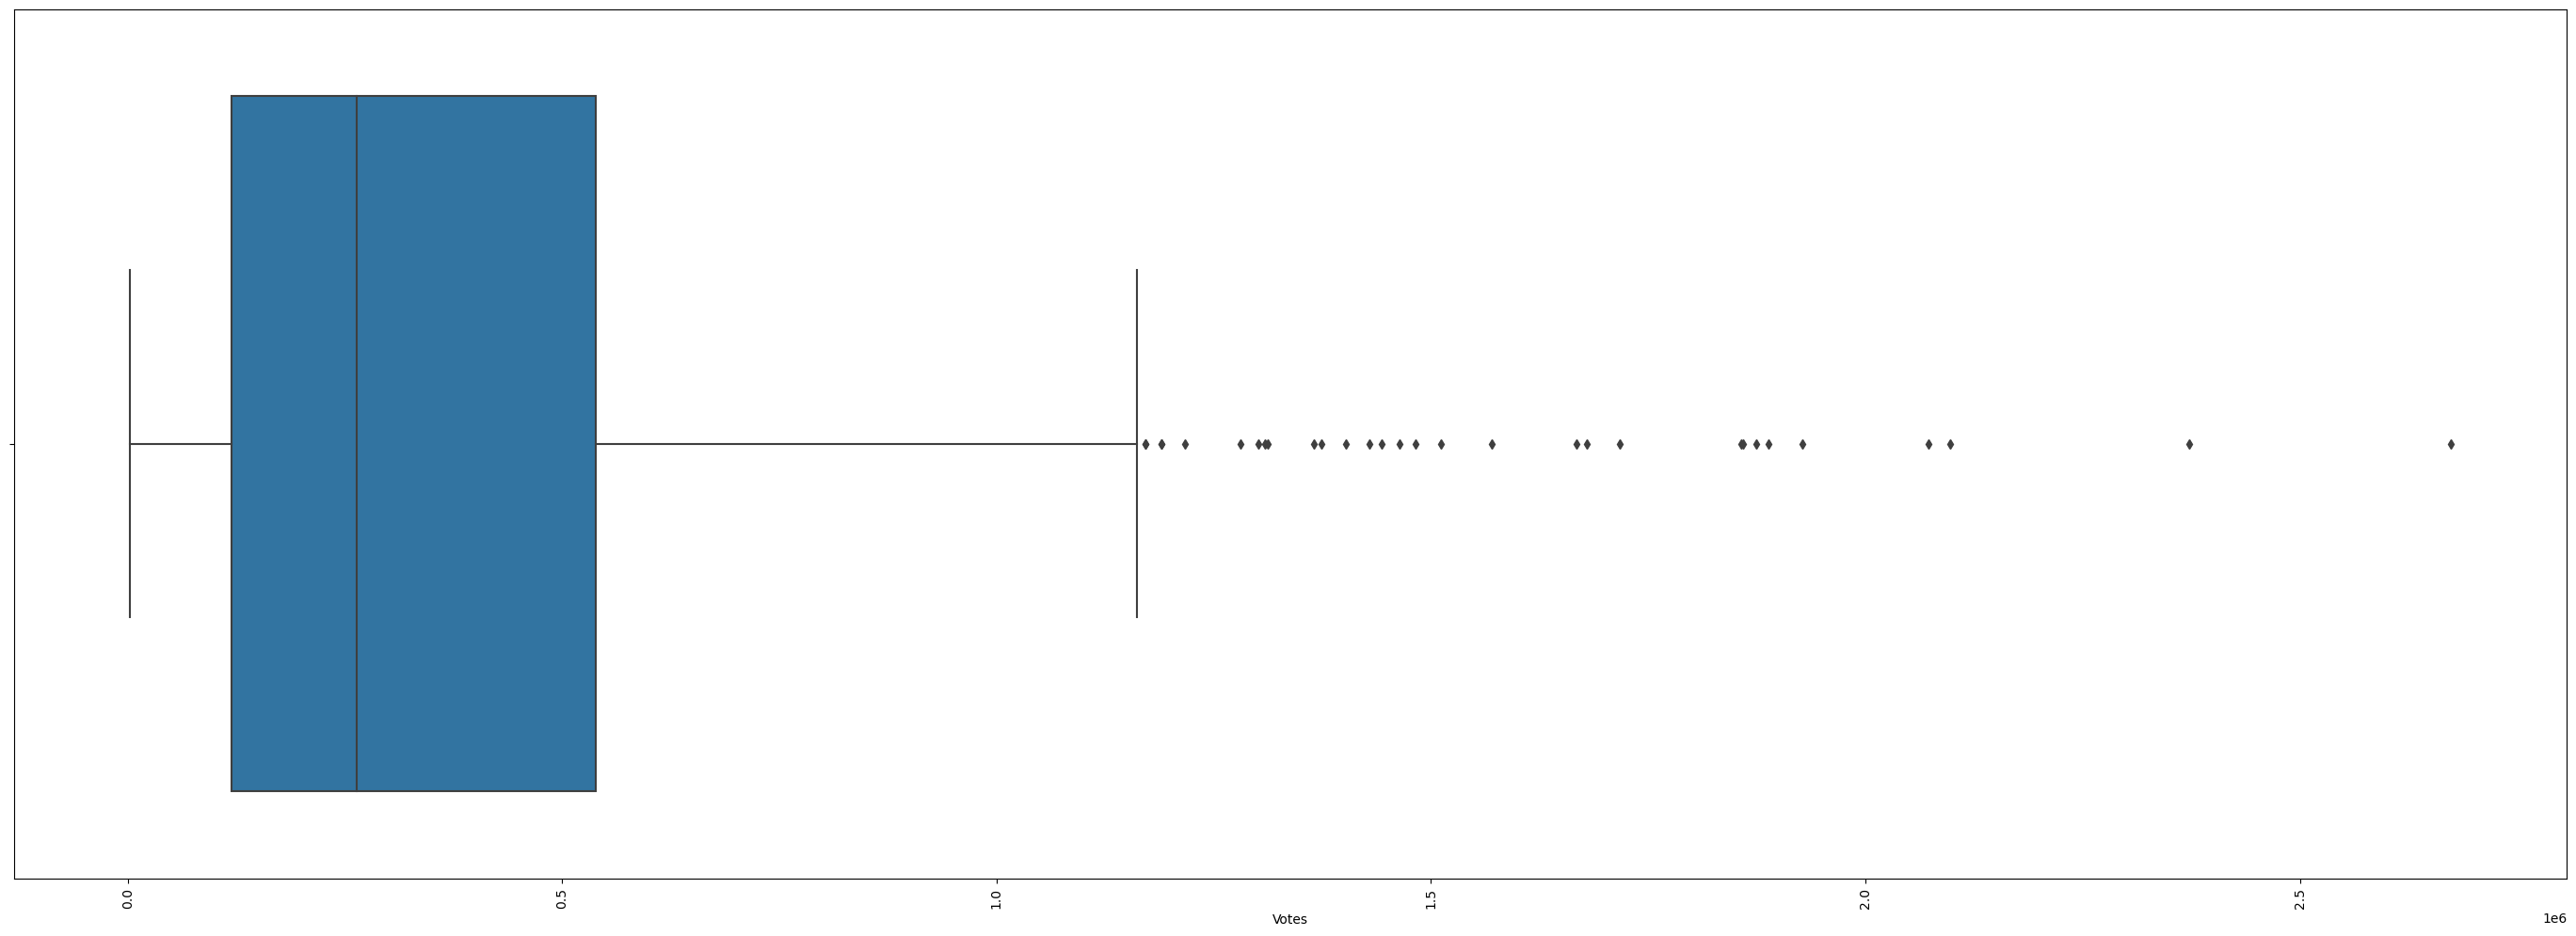

In [32]:
plt.figure(figsize=(35,12))
sns.boxplot(data=df,x="Votes")
plt.xticks(rotation=90)
plt.show

In [33]:
votemean = df['Votes'].mean()
movie_grtr_than_avrg_vote = df[df['Votes']>votemean][['Title','Votes']]

<AxesSubplot:xlabel='Votes', ylabel='Count'>

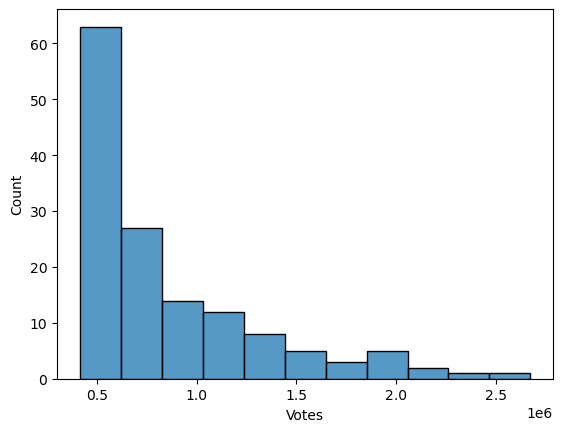

In [34]:
sns.histplot(x='Votes', data=movie_grtr_than_avrg_vote)

### Rating

-  ### Subtask 3.2: Find Top 10 Highest Rating Movies

    -  Create a new dataframe `Top_10_Rated` and by rating and store.

In [35]:
Top_10_Rated = df.sort_values(by ='Ratings',ascending = False).head(10)
Top_10_Rated[['Title','Ratings']]

,Title,Ratings
37,The Godfather,9.2
130,The Lord of the Rings: The Return of the King,9.0
38,The Godfather Part II,9.0
8,Schindler's List,9.0
26,The Dark Knight,9.0
80,Pulp Fiction,8.9
128,The Lord of the Rings: The Fellowship of the Ring,8.8
129,The Lord of the Rings: The Two Towers,8.8
84,"Il buono, il brutto, il cattivo",8.8
79,Forrest Gump,8.8


In [36]:
rating_mean = df['Ratings'].mean()
movie_grtr_than_avrg_rate = df[df['Ratings']>rating_mean]

<AxesSubplot:xlabel='Ratings', ylabel='Count'>

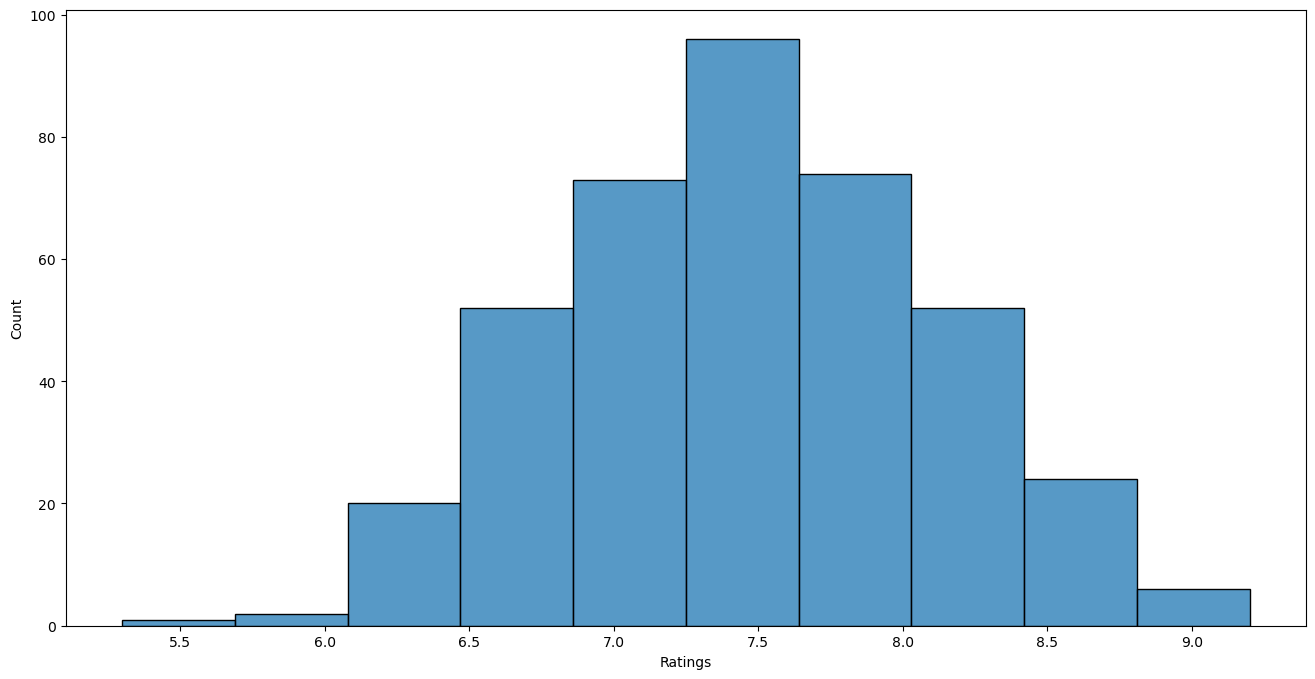

In [37]:
plt.figure(figsize=(16,8))
sns.histplot(x='Ratings', data=df,bins=10)

- Majority of movies are having 7.5 rating
- there are very less movies are havung 9.0 ratimgs

### Checking Outliers

<AxesSubplot:>

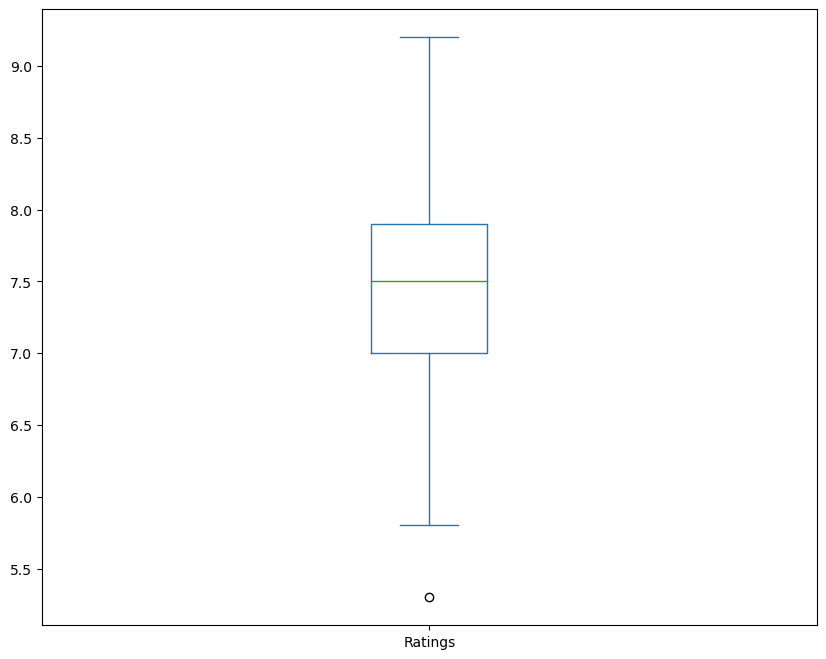

In [38]:
plt.figure(figsize=(10,8))
df['Ratings'].plot(kind='box')

<AxesSubplot:xlabel='Ratings', ylabel='Density'>

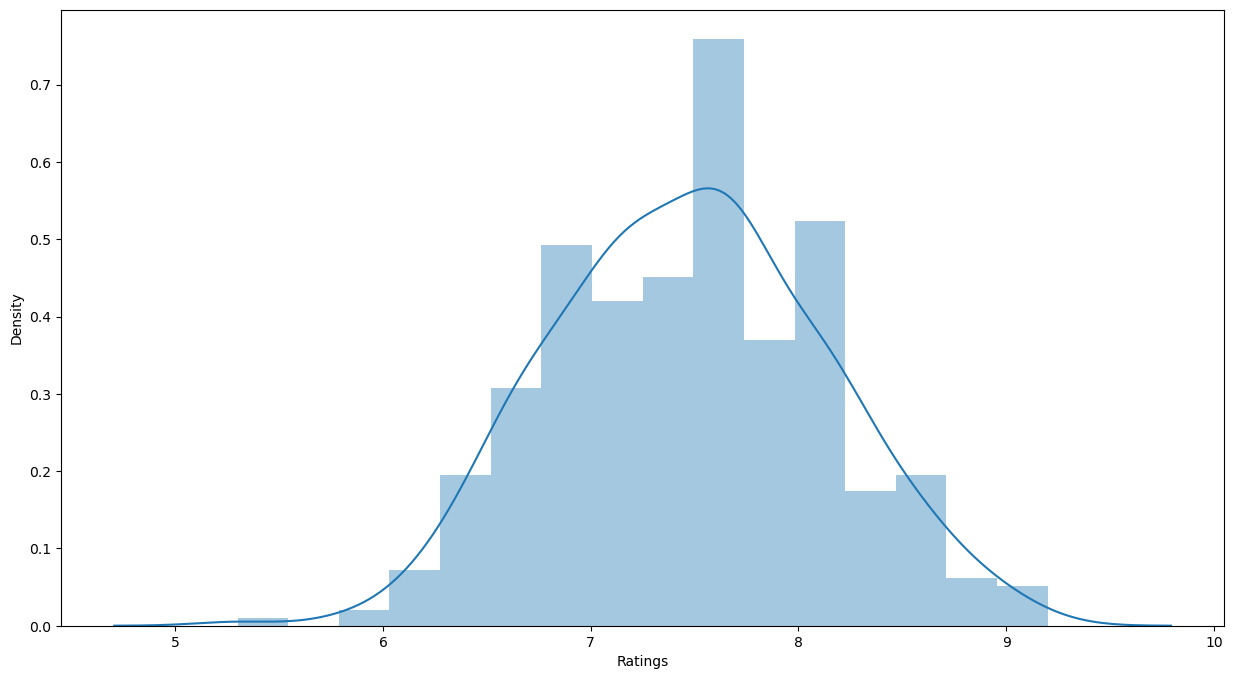

In [39]:
plt.figure(figsize=(15,8))
sns.distplot(data_copy['Ratings'])

# Runtime

-  ### Subtask 3.4: Find Top 10 Movies with longest Runtime

    - Create a new dataframe `Top_10_Lengthy` and by Runtime.

In [40]:
Top_10_Lengthy = df.sort_values(by ='Runtime',ascending = False).head(10)
Top_10_Lengthy[['Title','Runtime']]

,Title,Runtime
116,Zack Snyder's Justice League,242
353,Once Upon a Time in America,229
242,The Irishman,209
152,Malcolm X,202
38,The Godfather Part II,202
130,The Lord of the Rings: The Return of the King,201
8,Schindler's List,195
217,Titanic,194
172,The Green Mile,189
377,The Wolf of Wall Street,180


<AxesSubplot:xlabel='Runtime', ylabel='Density'>

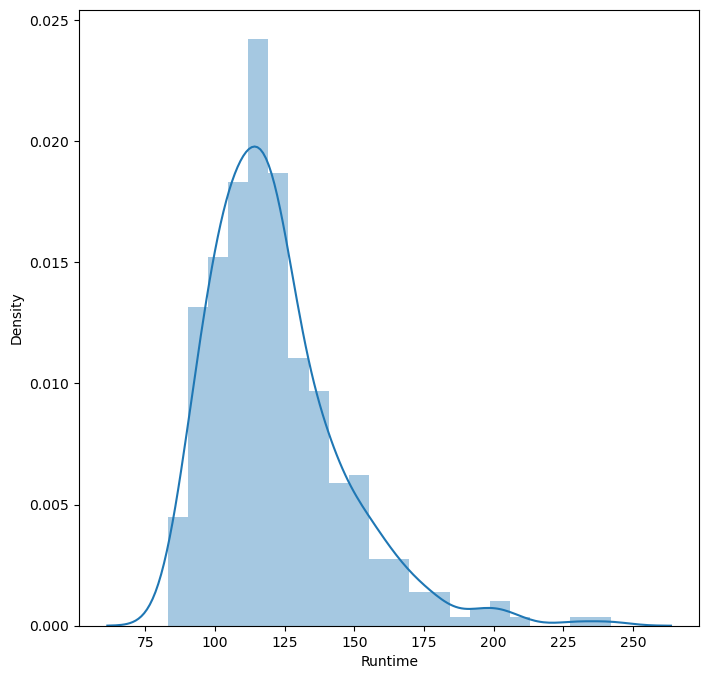

In [41]:
plt.figure(figsize=(8,8))
sns.distplot(df['Runtime'])

In [42]:
df['Runtime'].mean()

121.7075

In [43]:
min(df['Runtime'])

83

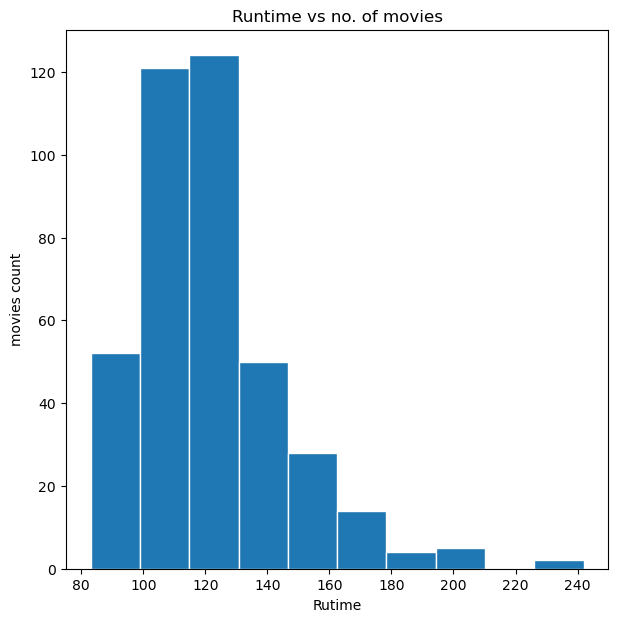

In [44]:
plt.figure(figsize=(7,7))
plt.hist(df.Runtime,edgecolor="w")
plt.xlabel('Rutime')
plt.ylabel("movies count")
plt.title("Runtime vs no. of movies")
plt.show()

- majority of movies rutime is 130 min 
- we can see that from above graph 60 movies runtime is 150 min
- and very few movies runtime is 240 minutes

### Checking Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2133702ceb0>,
 'caps': [<matplotlib.lines.Line2D at 0x21336fff490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2133702cbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x21336fffa30>],
 'fliers': [<matplotlib.lines.Line2D at 0x21336fffd00>],
 'means': []}

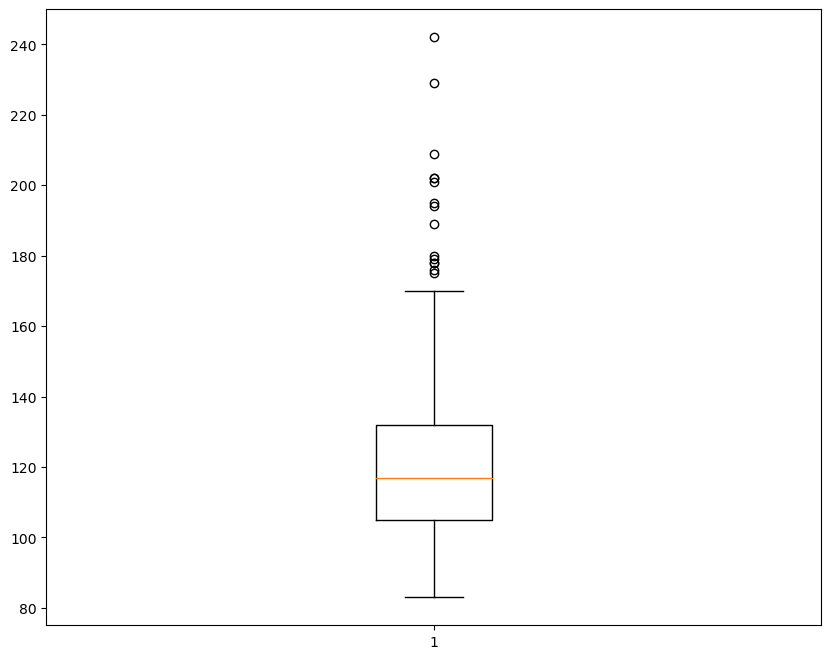

In [45]:
plt.figure(figsize=(10,8))
plt.boxplot(df.Runtime)


# Gross

<function matplotlib.pyplot.show(close=None, block=None)>

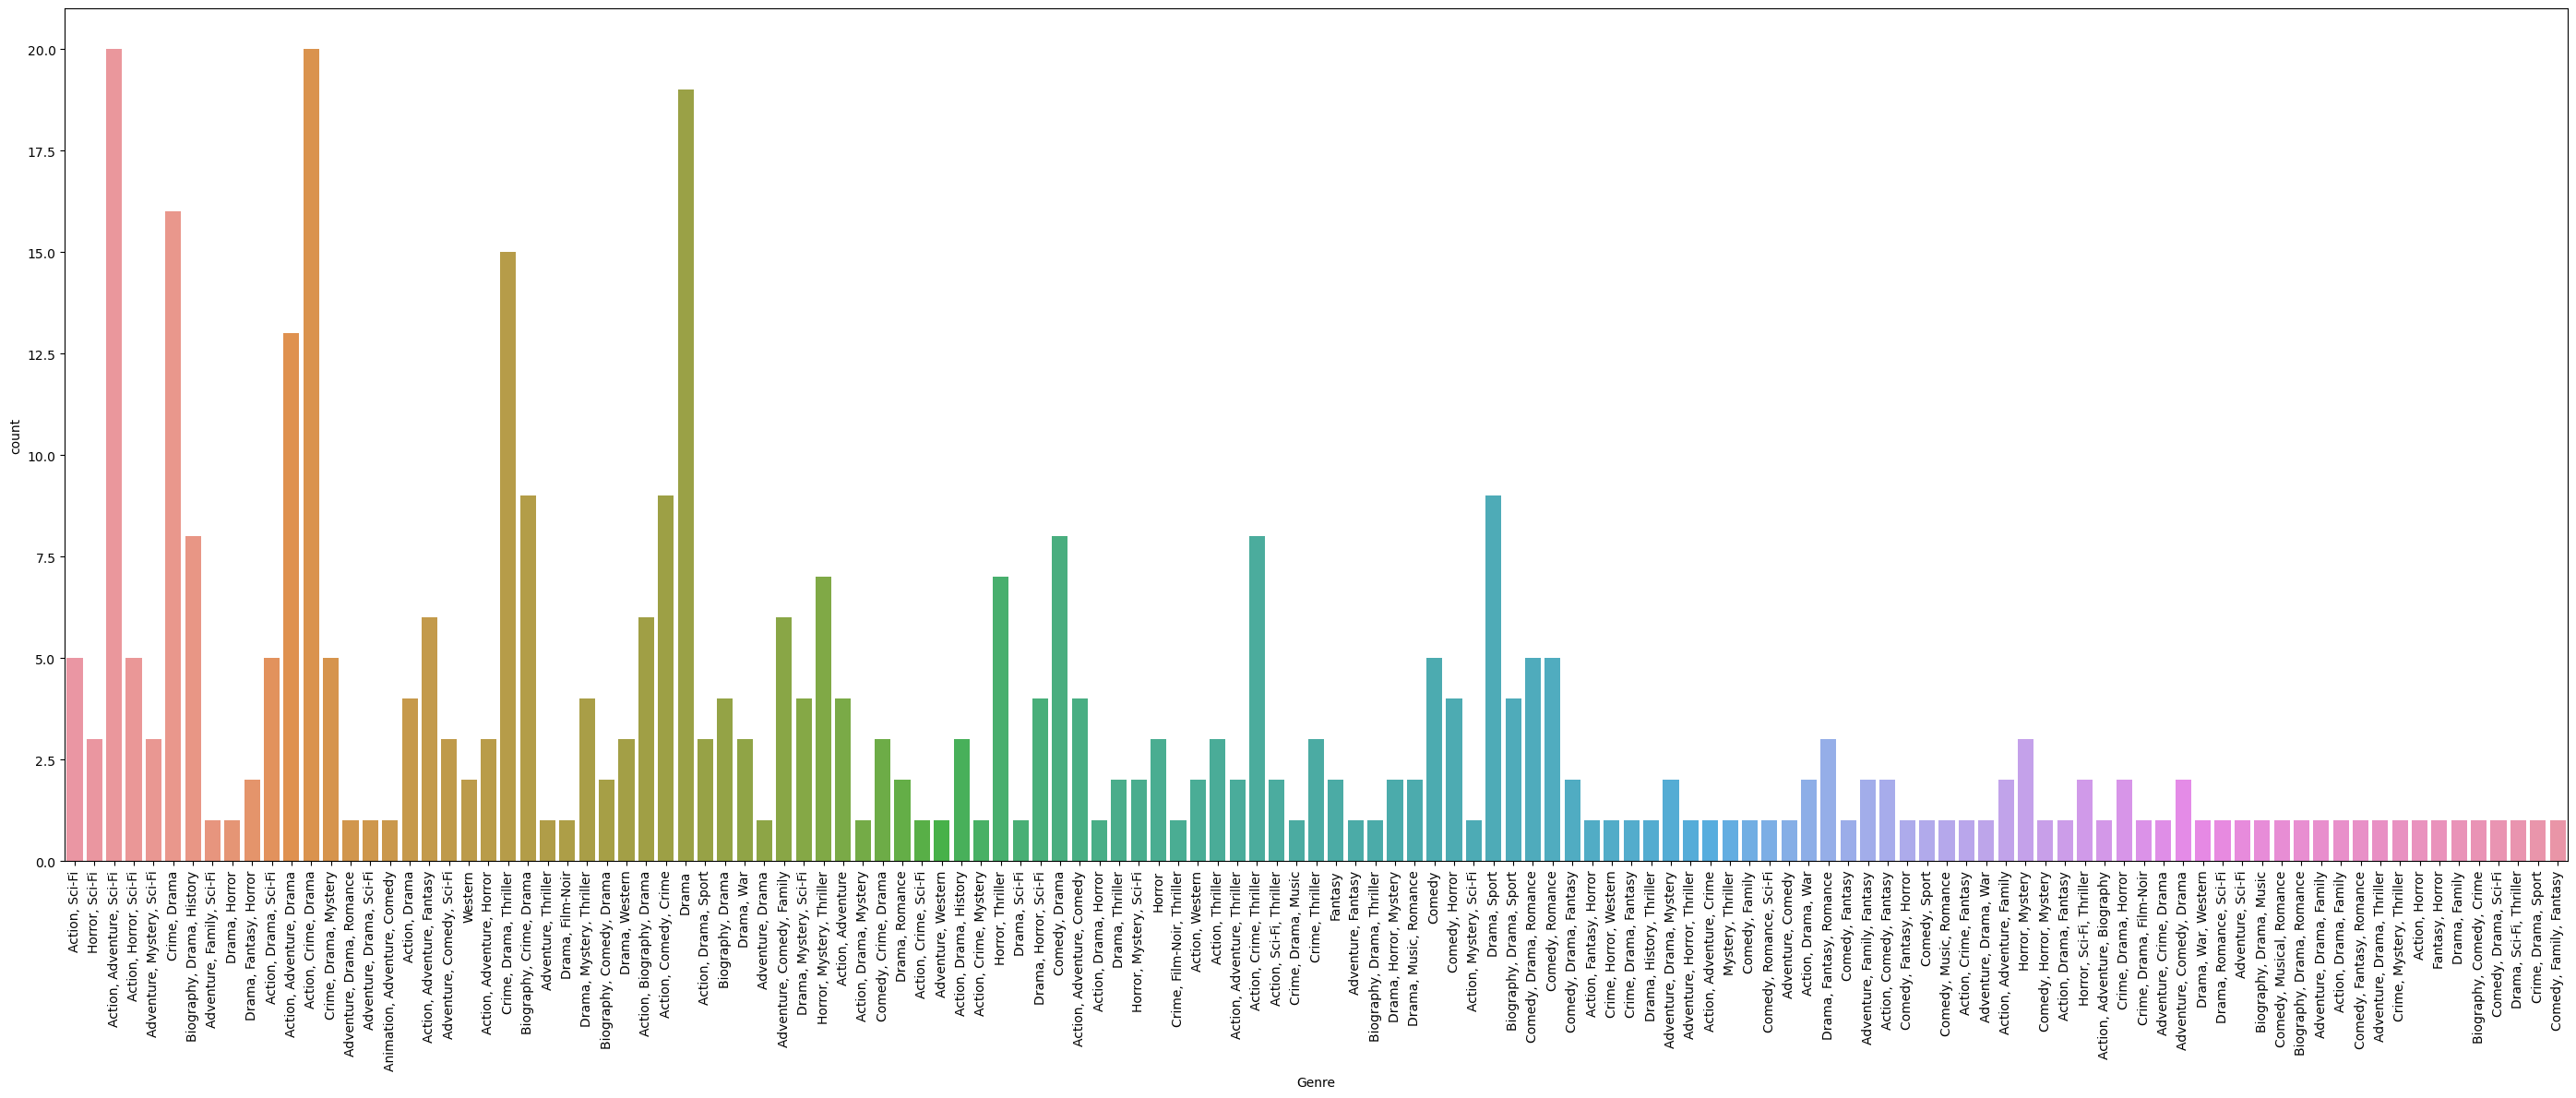

In [46]:
plt.figure(figsize=(35,12))
sns.countplot(data=df,x="Genre")
plt.xticks(rotation=90)
plt.show

### Gross

-  ### Subtask 3.3: top 10 movies with highest gross

In [47]:
top_10_gross = df.sort_values(by = 'Gross',ascending =False).head(10)
top_10_gross[['Title','Gross']]

,Title,Gross
31,Star Wars: Episode VII - The Force Awakens,936.659973
108,Avengers: Infinity War,678.820007
217,Titanic,659.330017
26,The Dark Knight,534.859985
168,Rogue One,532.179993
27,The Dark Knight Rises,448.140015
9,E.T. the Extra-Terrestrial,435.109985
43,Jurassic Park,402.450012
130,The Lord of the Rings: The Return of the King,377.850006
129,The Lord of the Rings: The Two Towers,342.549988


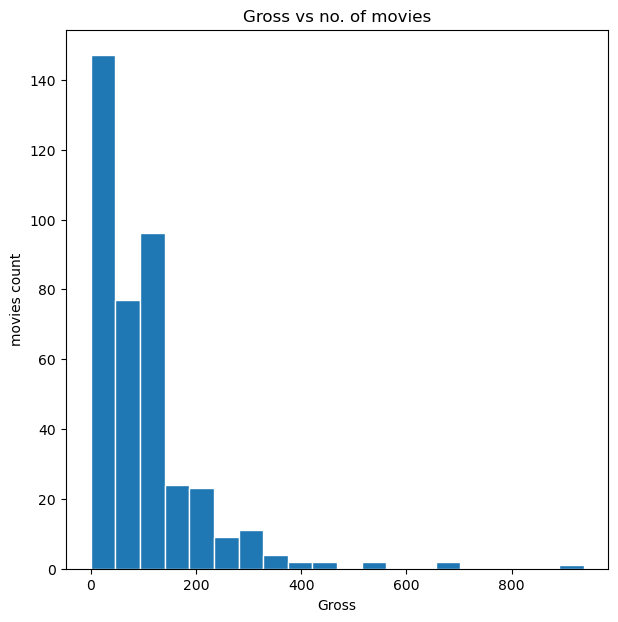

In [48]:
plt.figure(figsize=(7,7))
plt.hist(df.Gross,edgecolor="w",bins=20)
plt.xlabel('Gross')
plt.ylabel("movies count")
plt.title("Gross vs no. of movies")
plt.show()

<AxesSubplot:xlabel='Gross', ylabel='Density'>

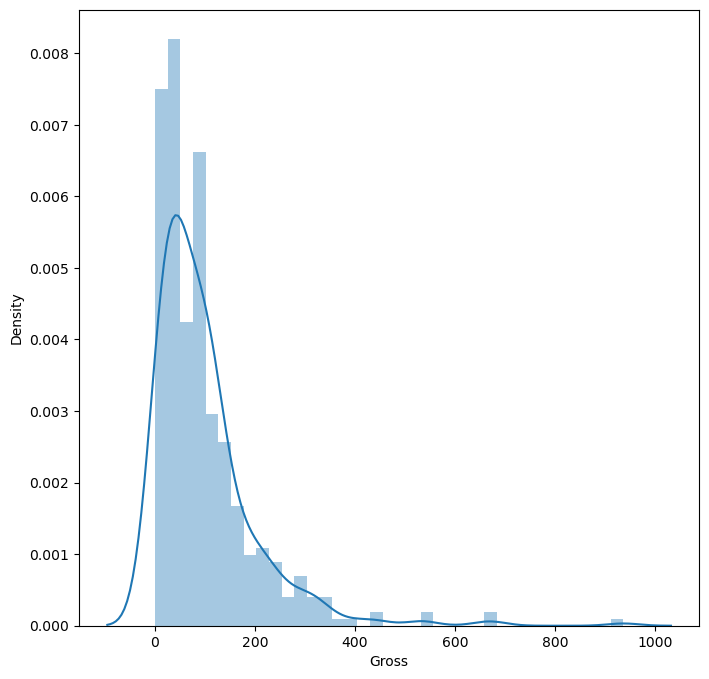

In [49]:
plt.figure(figsize=(8,8))
sns.distplot(df['Gross'])

# Bi-variate

-  ### Subtask 3.5: Find Top Gross Movies with  Genre.

    - Create a new dataframe `Top_10`.

In [50]:
df.sort_values(by = ['Gross'],ascending=False)[['Genre','Gross']][:10]

,Genre,Gross
31,"Action, Adventure, Sci-Fi",936.659973
108,"Action, Adventure, Sci-Fi",678.820007
217,"Drama, Romance",659.330017
26,"Action, Crime, Drama",534.859985
168,"Action, Adventure, Sci-Fi",532.179993
27,"Action, Drama",448.140015
9,"Adventure, Family, Sci-Fi",435.109985
43,"Action, Adventure, Sci-Fi",402.450012
130,"Action, Adventure, Drama",377.850006
129,"Action, Adventure, Drama",342.549988


In [51]:
df['Genre'].value_counts()[0:20]


Action, Adventure, Sci-Fi     20
Action, Crime, Drama          20
Drama                         19
Crime, Drama                  16
Crime, Drama, Thriller        15
Action, Adventure, Drama      13
Drama, Sport                   9
Action, Comedy, Crime          9
Biography, Crime, Drama        9
Biography, Drama, History      8
Action, Crime, Thriller        8
Comedy, Drama                  8
Horror, Mystery, Thriller      7
Horror, Thriller               7
Action, Biography, Drama       6
Adventure, Comedy, Family      6
Action, Adventure, Fantasy     6
Comedy                         5
Action, Sci-Fi                 5
Action, Drama, Sci-Fi          5
Name: Genre, dtype: int64

In [52]:
# Creating a DataFrame for the top 5 Genre's using Groupby and Concat
genre=df.groupby("Genre")
d_as=genre.get_group("Action, Sci-Fi")
d_ads=genre.get_group('Action, Drama, Sci-Fi')
d_aad=genre.get_group('Action, Adventure, Drama')
d_acd=genre.get_group('Action, Crime, Drama')
d_hs=genre.get_group('Horror, Sci-Fi')
d_aas=genre.get_group('Action, Adventure, Sci-Fi')
d_ahs=genre.get_group('Action, Horror, Sci-Fi')
d_ams=genre.get_group('Adventure, Mystery, Sci-Fi')
d_cd=genre.get_group('Crime, Drama')
d_cdt=genre.get_group('Crime, Drama, Thriller')
d_bcd=genre.get_group('Biography, Crime, Drama')
d_bdh=genre.get_group('Biography, Drama, History')
d_afs=genre.get_group('Adventure, Family, Sci-Fi')
d_dh=genre.get_group( 'Drama, Horror')
d_dfh=genre.get_group( 'Drama, Fantasy, Horror')
d_cdm=genre.get_group( 'Crime, Drama, Mystery')
d_adr=genre.get_group( 'Adventure, Drama, Romance')
d_ads=genre.get_group( 'Adventure, Drama, Sci-Fi')
d_aac=genre.get_group( 'Animation, Adventure, Comedy')
d_ad=genre.get_group( 'Action, Drama')
d_aaf=genre.get_group(  'Action, Adventure, Fantasy')
d_acs=genre.get_group( 'Adventure, Comedy, Sci-Fi')
d_acc=genre.get_group( 'Action, Comedy, Crime')
d_d = genre.get_group('Drama')
d_ds = genre.get_group('Drama, Sport')



df_group=pd.concat([d_as,d_hs,d_aas,d_ahs,d_ams,d_cd,d_ads,d_aad,d_acd,d_acc,d_cdt,d_bcd,
                    d_bdh,d_afs,d_dh,d_dfh,d_cdm,d_adr,d_ads,d_aac,d_ad,d_aaf,d_acs,d_ds],ignore_index=True)
df_group

,Title,Genre,Runtime,YearOfRelease,Directors,Stars,Ratings,Votes,Gross
0,The Matrix,"Action, Sci-Fi",136,1999,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",8.7,1926843,171.479996
1,The Matrix Reloaded,"Action, Sci-Fi",138,2003,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",7.2,600751,281.489990
2,The Matrix Revolutions,"Action, Sci-Fi",129,2003,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",6.7,518672,139.309998
3,The Terminator,"Action, Sci-Fi",107,1984,James Cameron,"Arnold Schwarzenegger, Linda Hamilton, Michael...",8.1,873223,38.400002
4,Terminator 2: Judgment Day,"Action, Sci-Fi",137,1991,James Cameron,"Arnold Schwarzenegger, Linda Hamilton, Edward ...",8.6,1107307,204.839996
...,...,...,...,...,...,...,...,...,...
156,Rocky III,"Drama, Sport",99,1982,Sylvester Stallone,"Sylvester Stallone, Talia Shire, Burt Young, C...",6.8,195456,125.050003
157,Rocky IV,"Drama, Sport",91,1985,Sylvester Stallone,"Sylvester Stallone, Talia Shire, Burt Young, C...",6.8,209809,127.870003
158,Rocky V,"Drama, Sport",104,1990,John G. Avildsen,"Sylvester Stallone, Talia Shire, Burt Young, S...",5.3,140434,40.950001
159,Any Given Sunday,"Drama, Sport",162,1999,Oliver Stone,"Al Pacino, Dennis Quaid, Cameron Diaz, James W...",6.9,121747,75.529999


<function matplotlib.pyplot.show(close=None, block=None)>

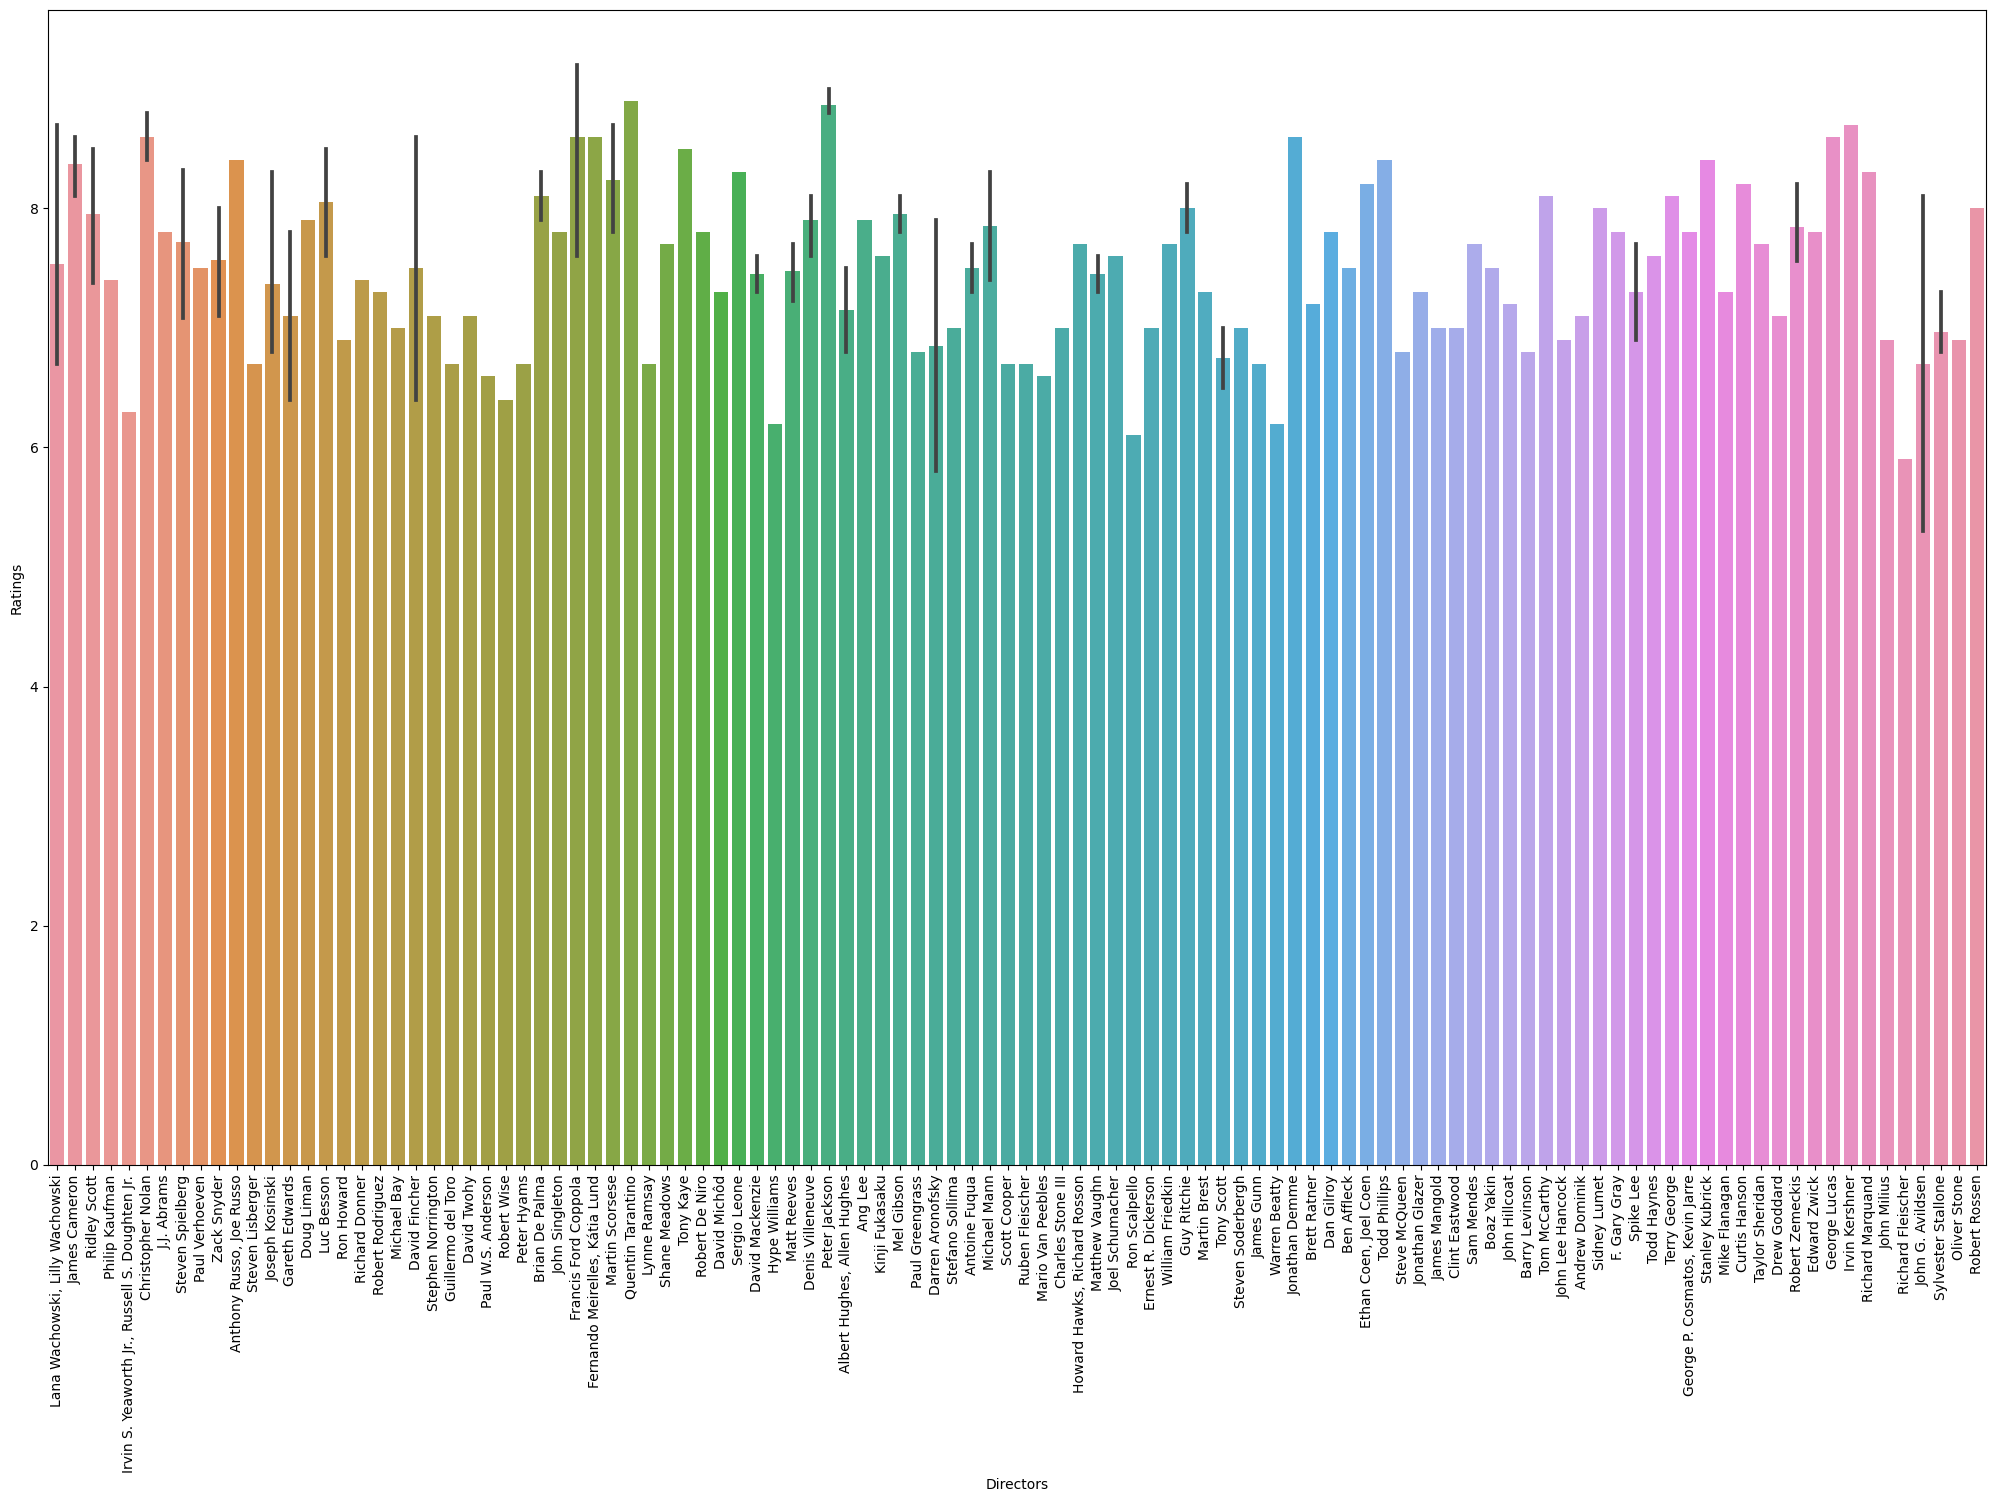

In [53]:
plt.figure(figsize=(25,15))
sns.barplot(data = df_group,x = df_group.Directors,y=df_group.Ratings)
plt.xticks(rotation=90)
plt.show

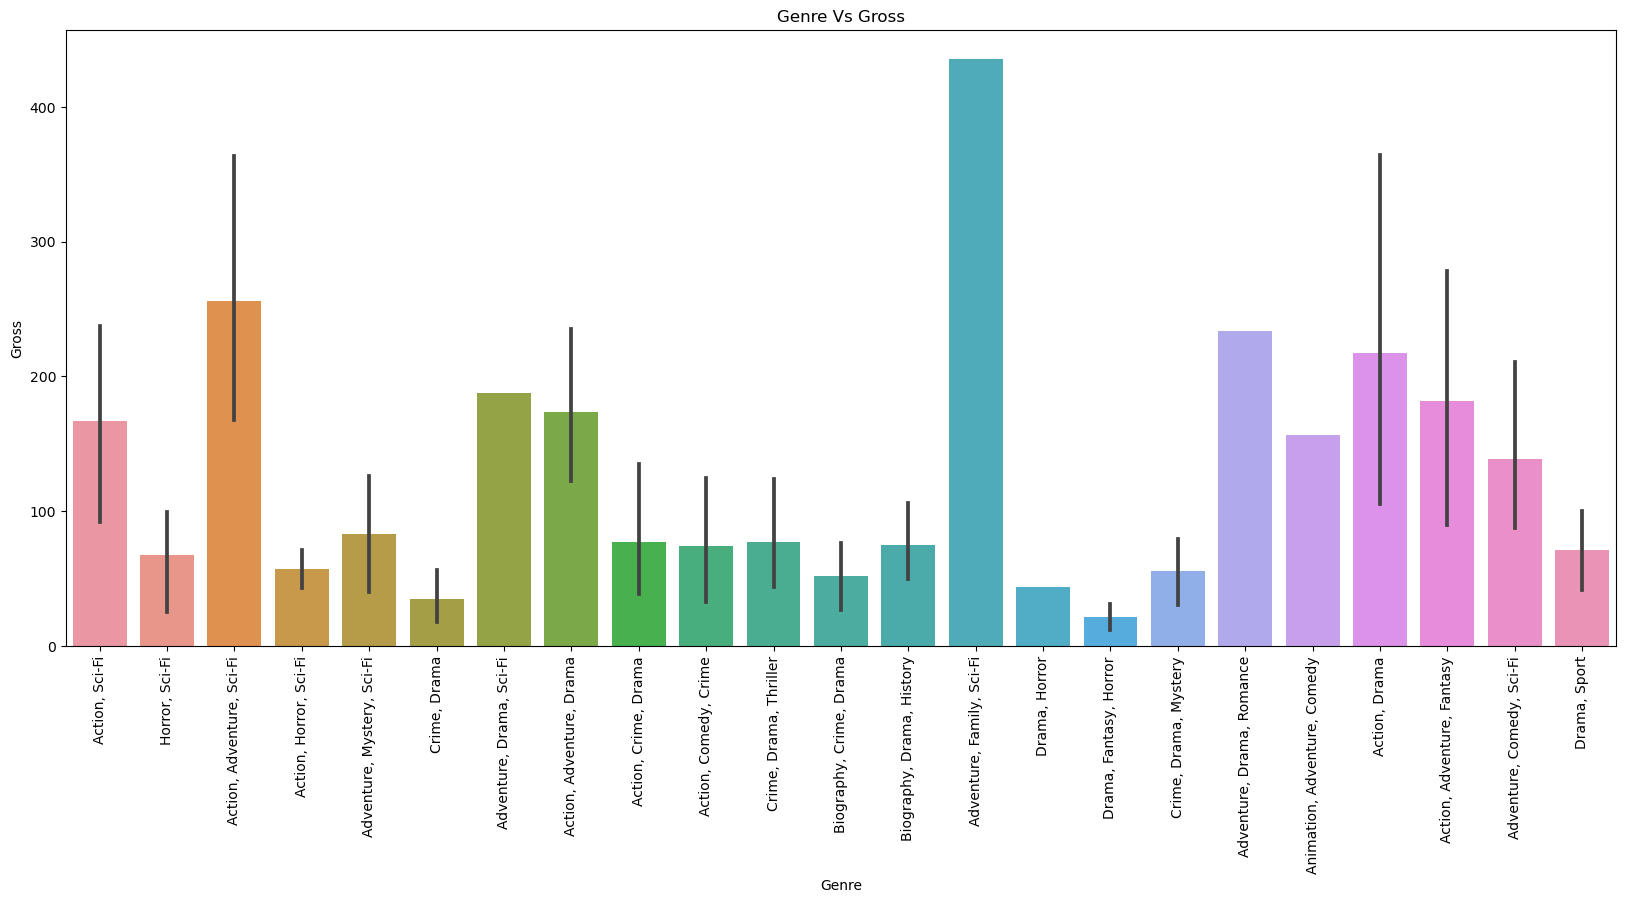

In [54]:
plt.figure(figsize=(20,8))
sns.barplot(x=df_group['Genre'],y=df_group['Gross'])
plt.xticks(rotation=90)
plt.title("Genre Vs Gross")
plt.show()

Text(0.5, 1.0, 'Gross vs Genre')

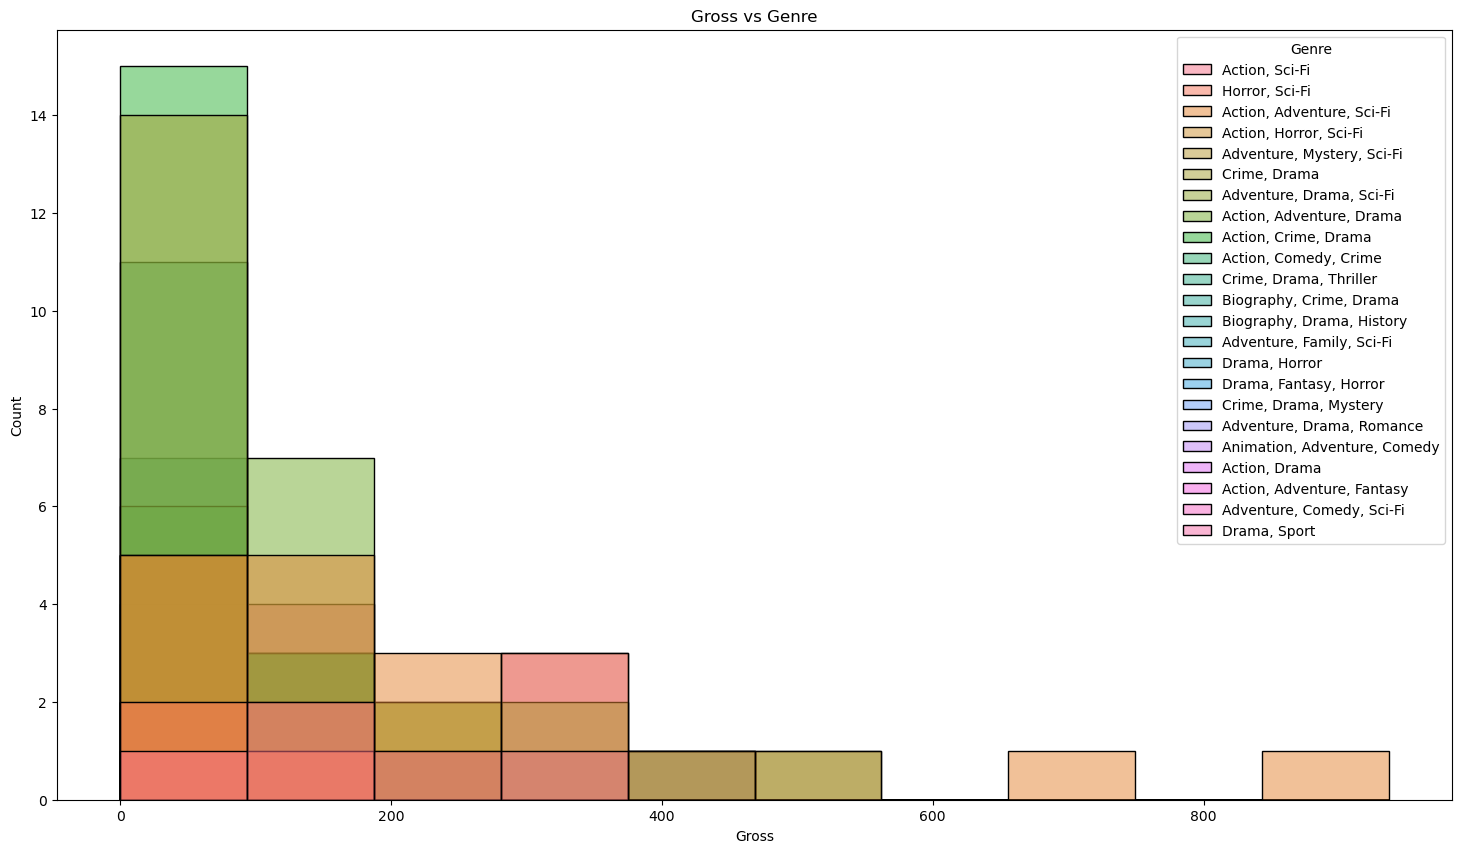

In [55]:
# bivariate analysiss 
plt.figure(figsize = (18,10))
sns.histplot(data=df_group,x='Gross',bins=10,hue='Genre')
plt.title("Gross vs Genre")

<function matplotlib.pyplot.show(close=None, block=None)>

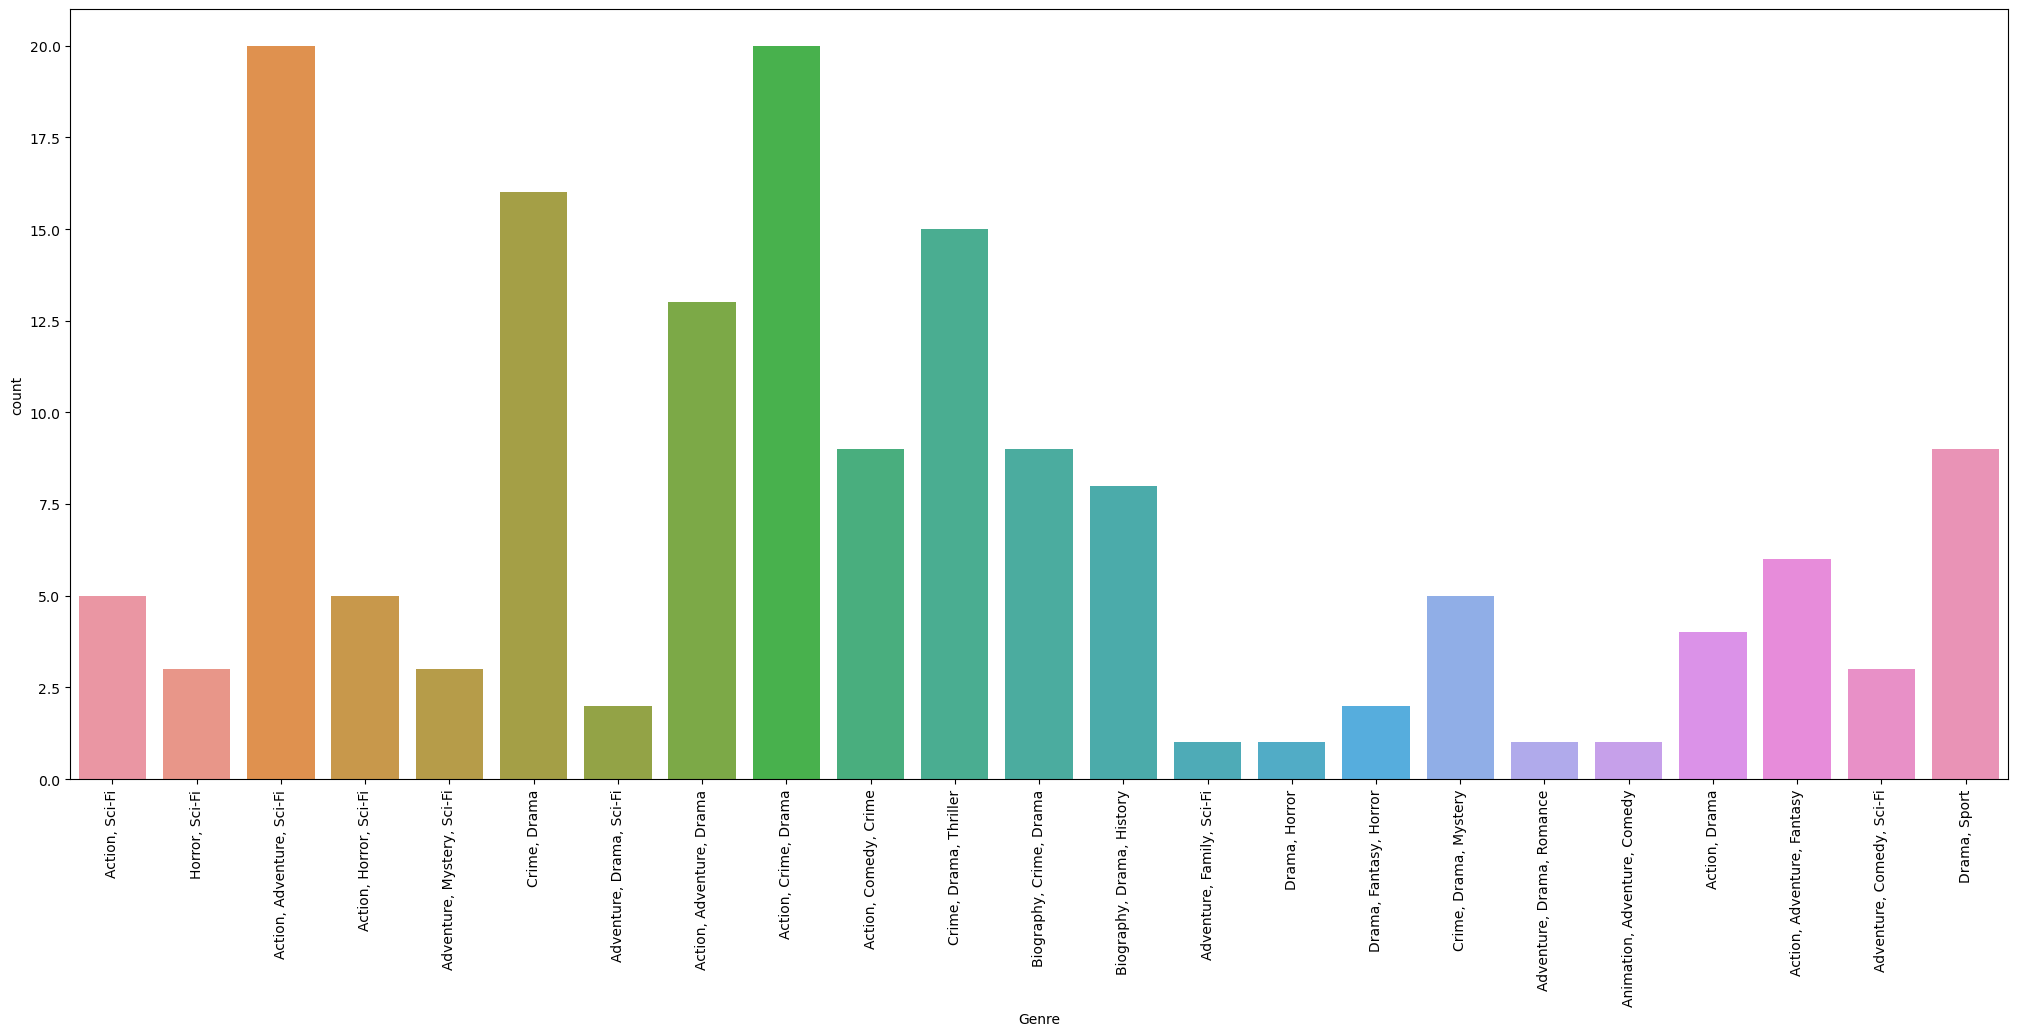

In [56]:
plt.figure(figsize=(25,10))
sns.countplot(data=df_group,x="Genre")
plt.xticks(rotation=90)
plt.show

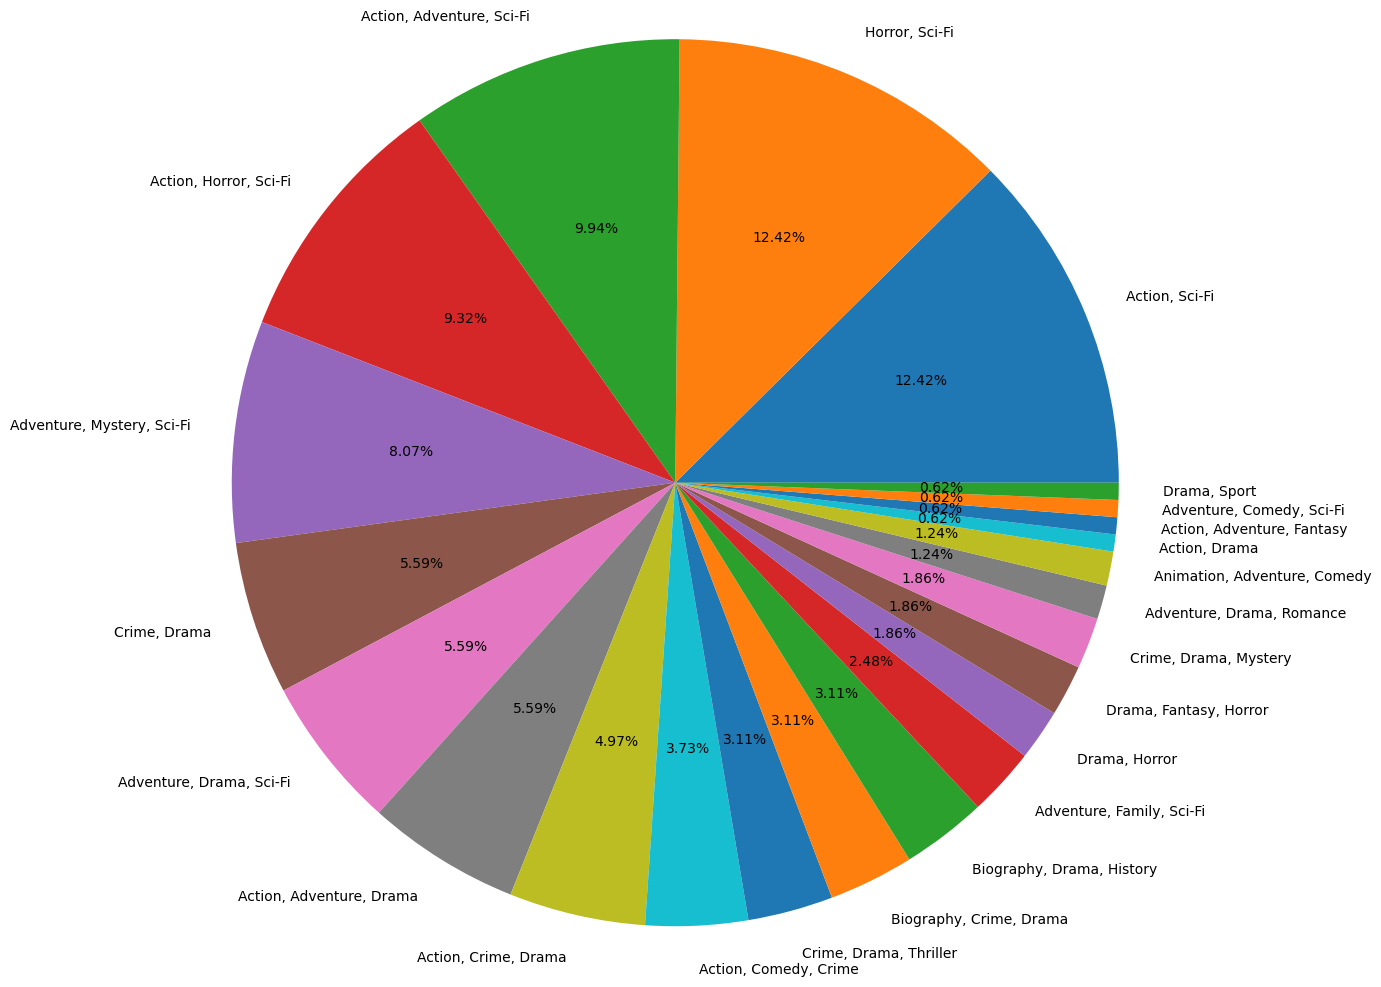

In [57]:
plt.pie(df_group.Genre.value_counts(),autopct="%0.2f%%",labels=df_group.Genre.unique(),radius=3.0)
plt.show()

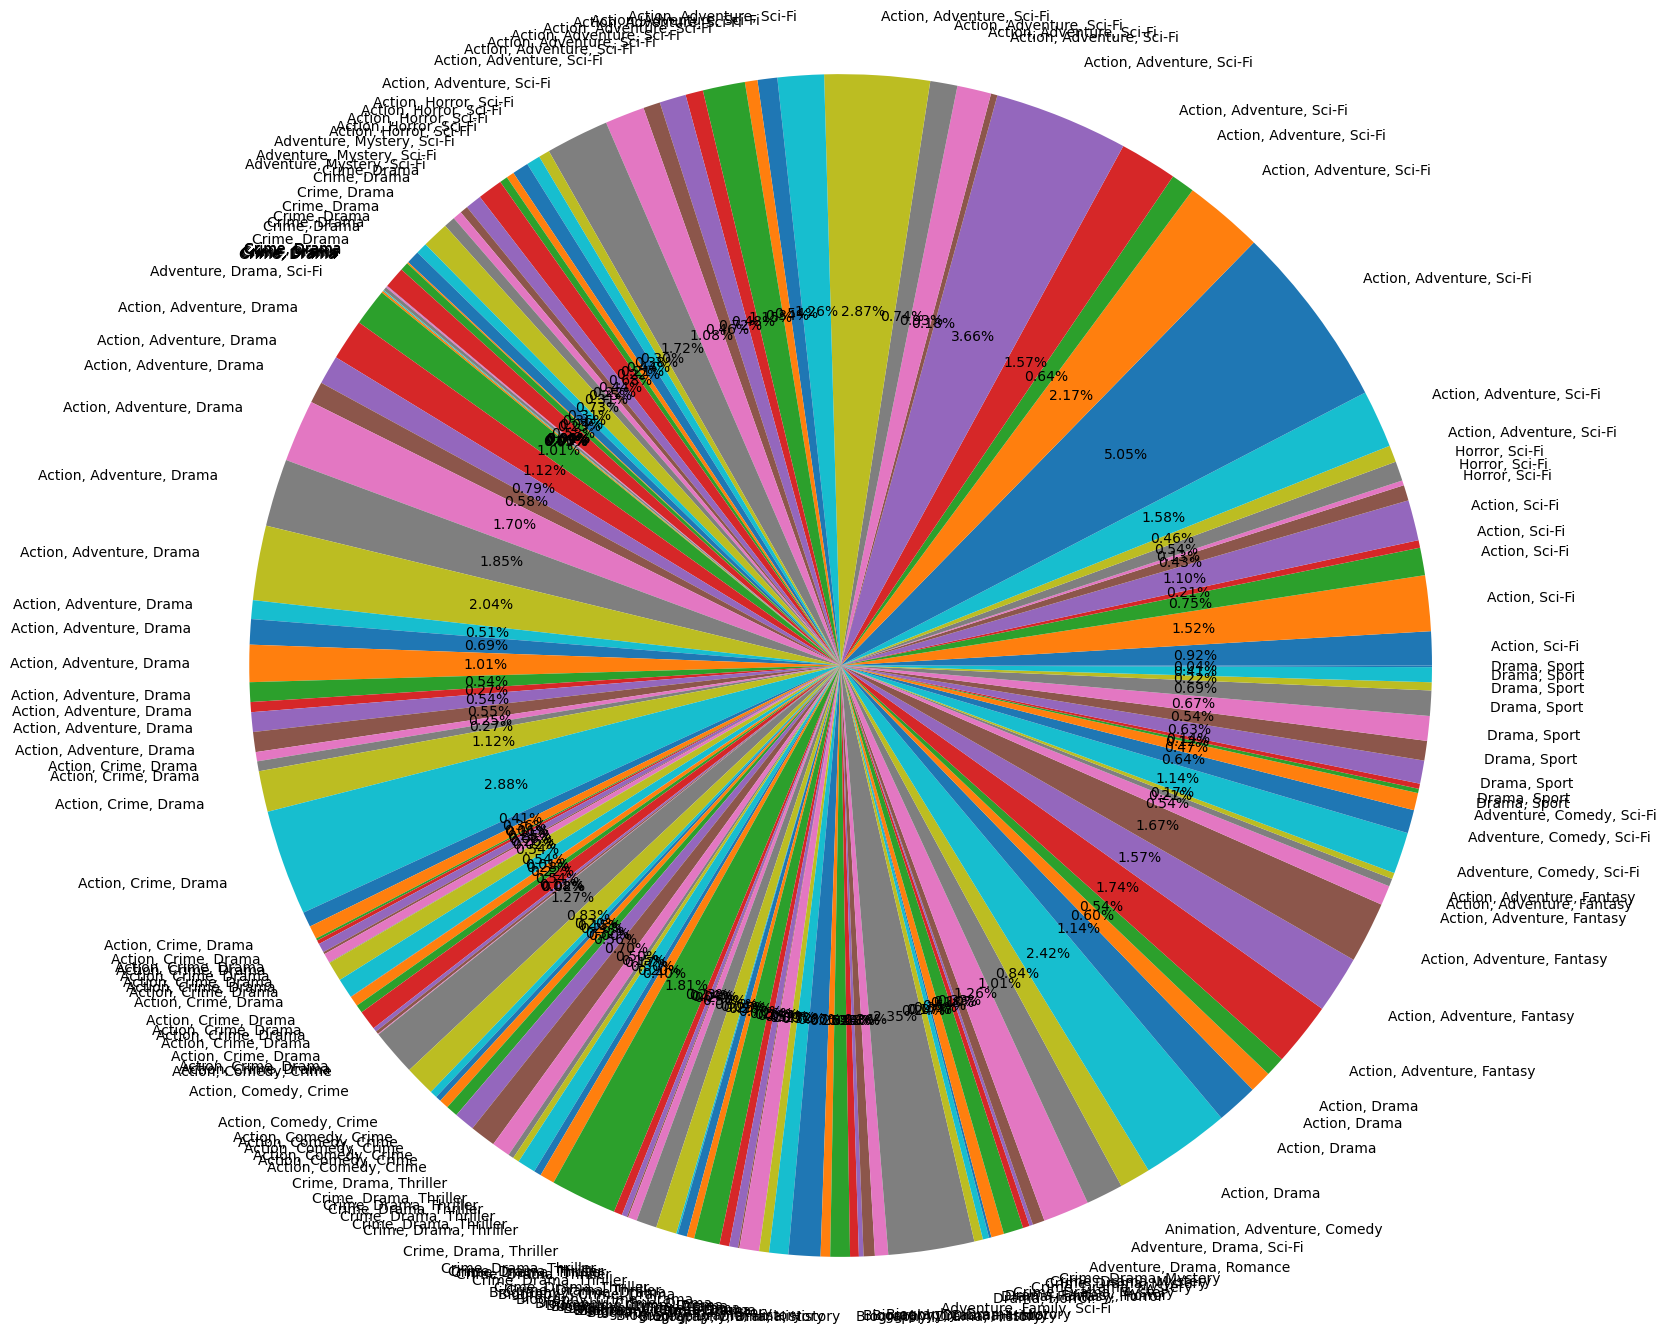

In [58]:
plt.pie(df_group.Gross,autopct="%0.2f%%",labels=df_group.Genre,radius=4.0)
plt.show()

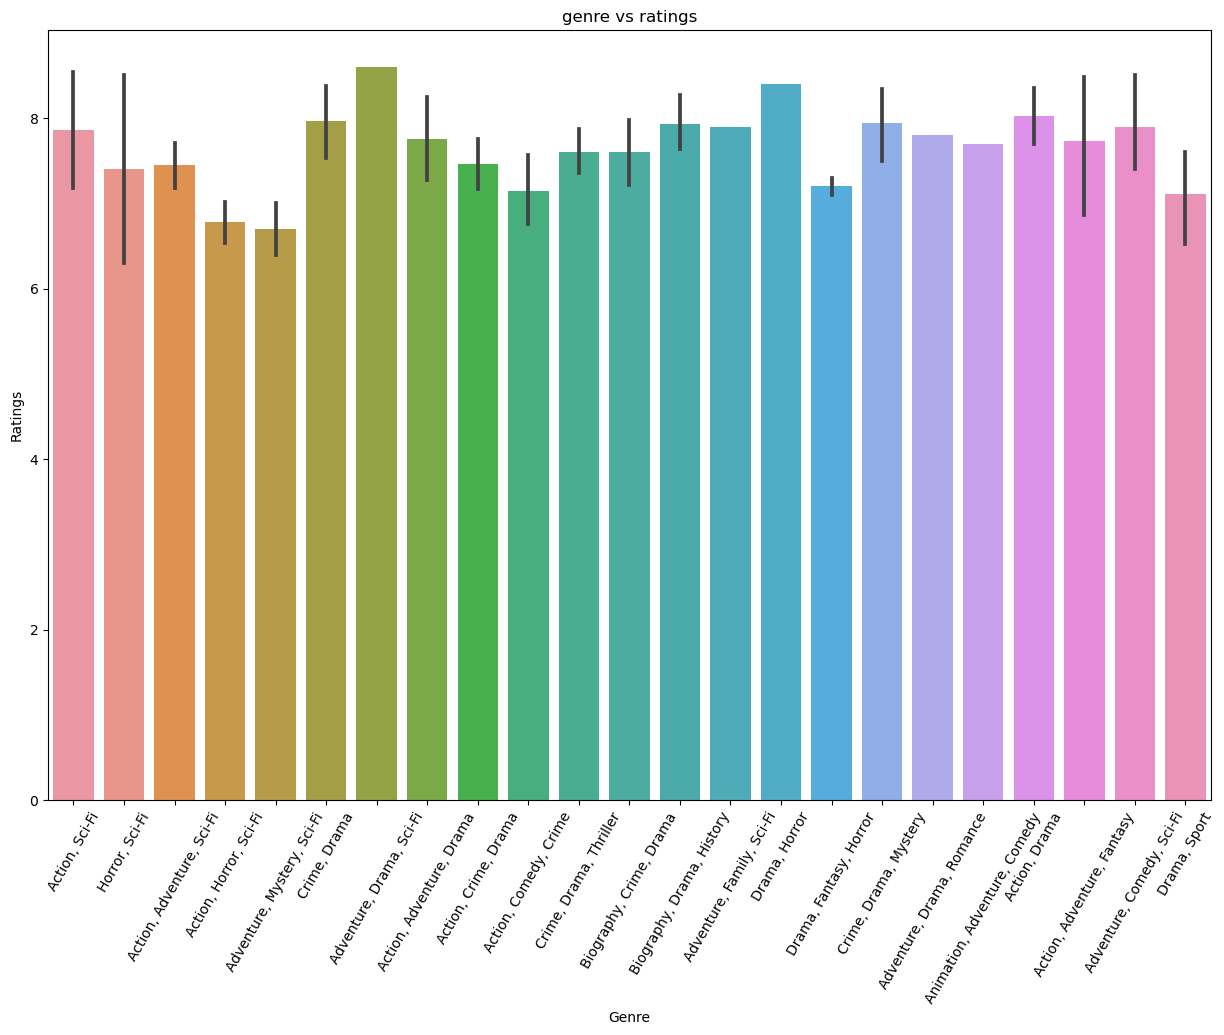

In [59]:
plt.figure(figsize=(15,10))
sns.barplot(x=df_group.Genre,y=df_group.Ratings)
plt.xticks(rotation=60)
plt.title("genre vs ratings")
plt.show()

<AxesSubplot:xlabel='Votes', ylabel='Ratings'>

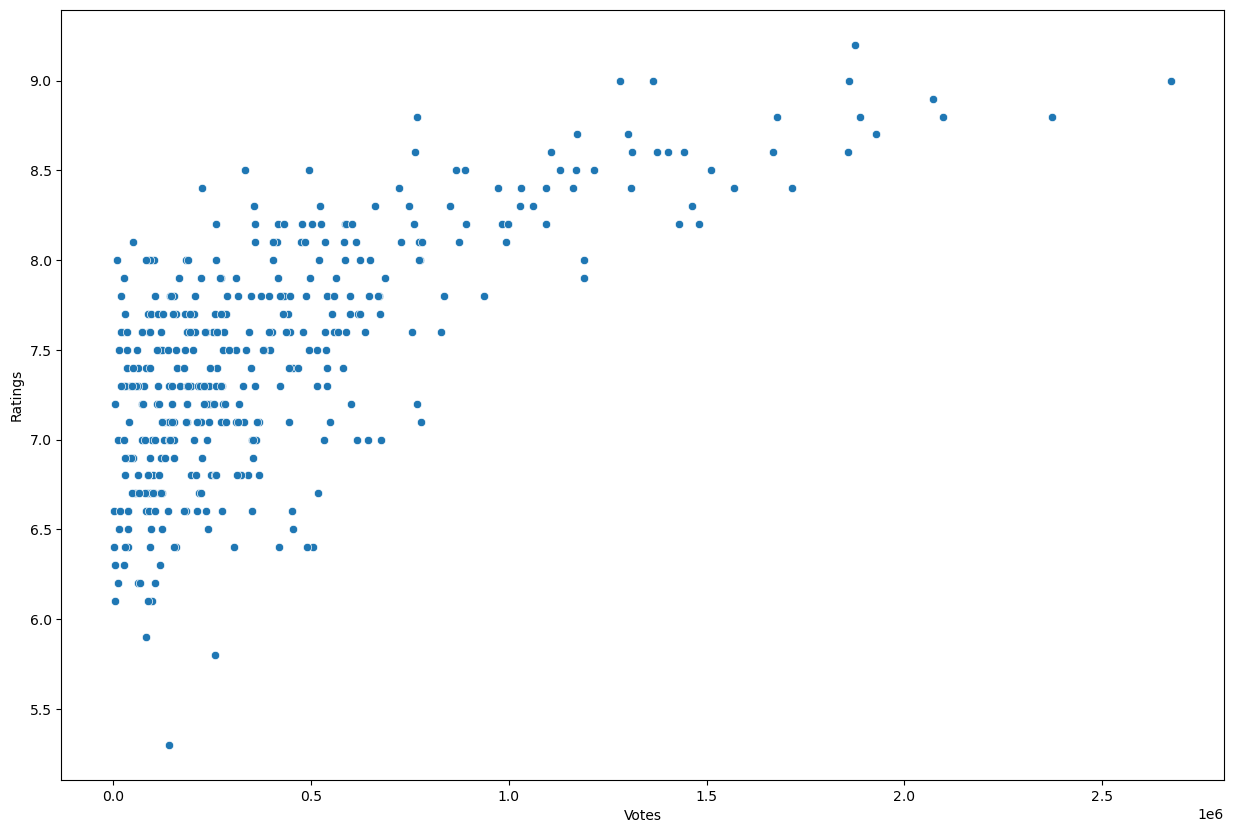

In [60]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df,x="Votes",y="Ratings")

<AxesSubplot:xlabel='Votes', ylabel='Gross'>

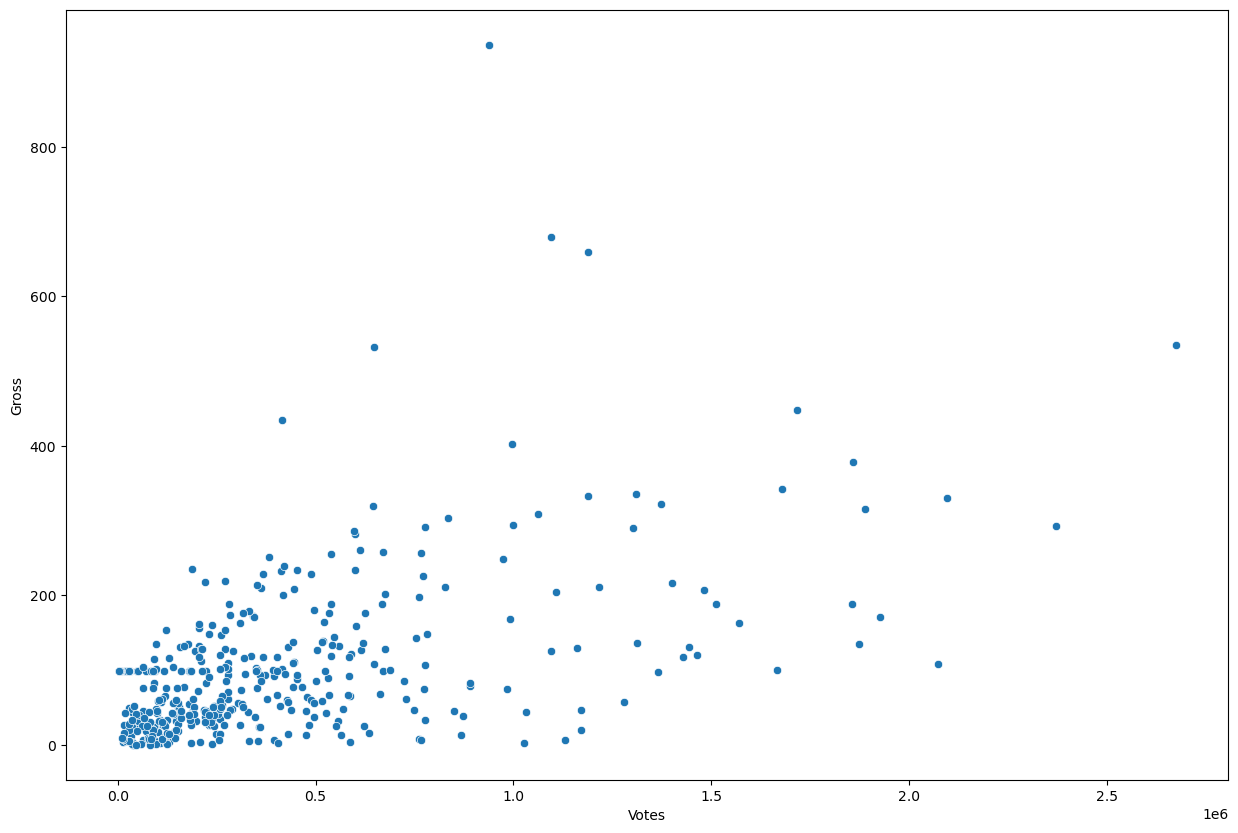

In [61]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df,x="Votes",y="Gross")

<AxesSubplot:xlabel='Ratings', ylabel='Gross'>

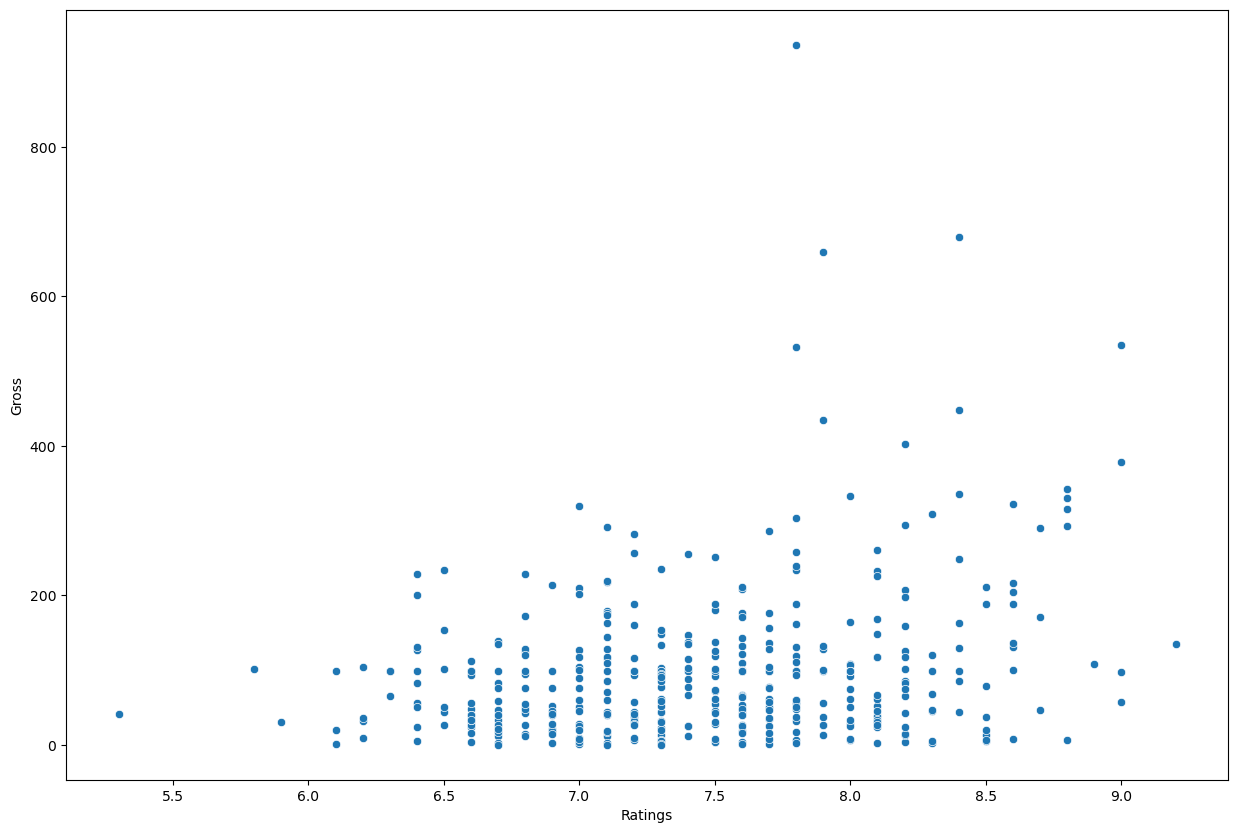

In [62]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df,x="Ratings",y="Gross")

# Multi-Variate analysis

In [63]:
dfcorr  = data_copy.corr()
dfcorr

,Runtime,YearOfRelease,Ratings,Votes,Gross
Runtime,1.000000,0.176938,0.449310,0.462184,0.277638
YearOfRelease,0.176938,1.000000,-0.159391,0.091858,0.119190
Ratings,0.449310,-0.159391,1.000000,0.689345,0.265202
Votes,0.462184,0.091858,0.689345,1.000000,0.536708
Gross,0.277638,0.119190,0.265202,0.536708,1.000000


<AxesSubplot:>

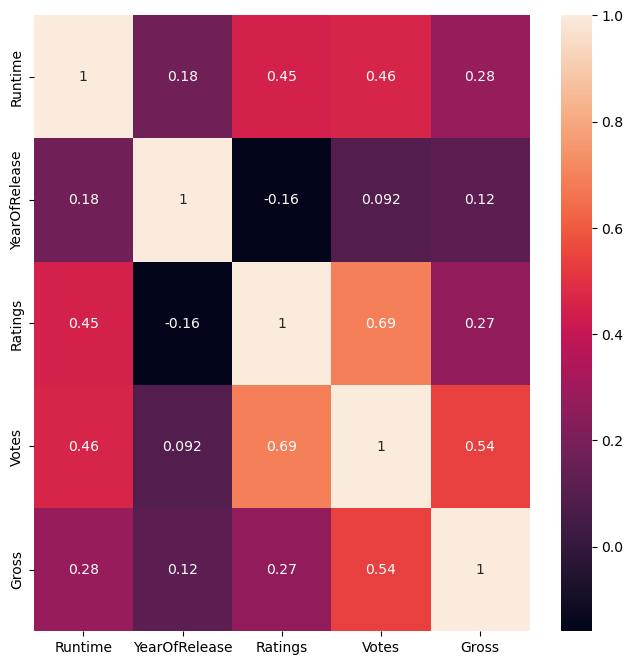

In [64]:
plt.figure(figsize=(8,8)) 
sns.heatmap(dfcorr,xticklabels=dfcorr.columns,yticklabels=dfcorr.columns,annot=True)

<Figure size 400x400 with 0 Axes>

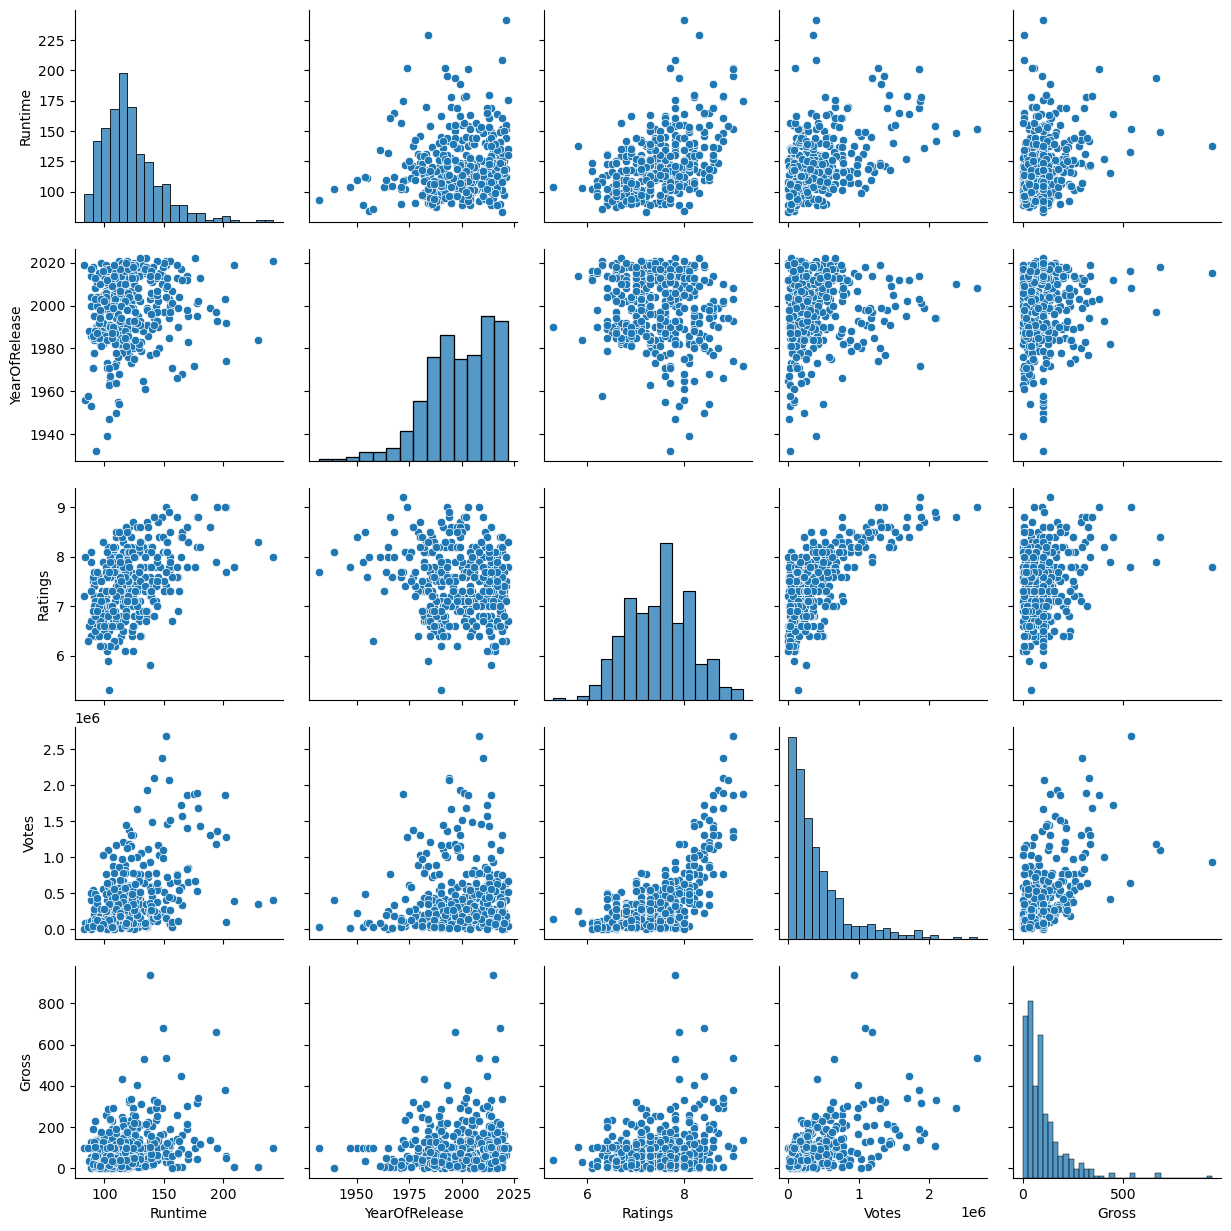

In [65]:
plt.figure(figsize=(4,4))
sns.pairplot(df)